# Task
Perform a simple linear regression analysis on the 'insurance.csv' dataset to predict insurance charges. This involves loading and inspecting the data, conducting exploratory data analysis, preprocessing the data, implementing and evaluating a simple linear regression model, visualizing the results, and generating a PDF report summarizing all findings.

## Load and Inspect Data

### Subtask:
Load the 'insurance.csv' dataset into a pandas DataFrame and display its head, information, and descriptive statistics to understand the data structure and content.


**Reasoning**:
To begin the data analysis, I will import the pandas library, load the 'insurance.csv' dataset into a DataFrame, and then display its head, information summary, and descriptive statistics to get a comprehensive overview of the data structure and content.



In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')

print("DataFrame Head:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDataFrame Descriptive Statistics:")
print(df.describe())

DataFrame Head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

DataFrame Descriptive Statistics:
               age          

## Exploratory Data Analysis (EDA)

### Subtask:
Perform exploratory data analysis to visualize the distributions of all features and identify the most suitable feature for simple linear regression by analyzing its relationship with 'charges'.


**Reasoning**:
To begin the Exploratory Data Analysis, I will import the necessary libraries, `matplotlib.pyplot` and `seaborn`, to facilitate data visualization. This is a prerequisite for generating any plots.



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
I will visualize the distributions of numerical features using histograms and categorical features using count plots to understand their individual characteristics.



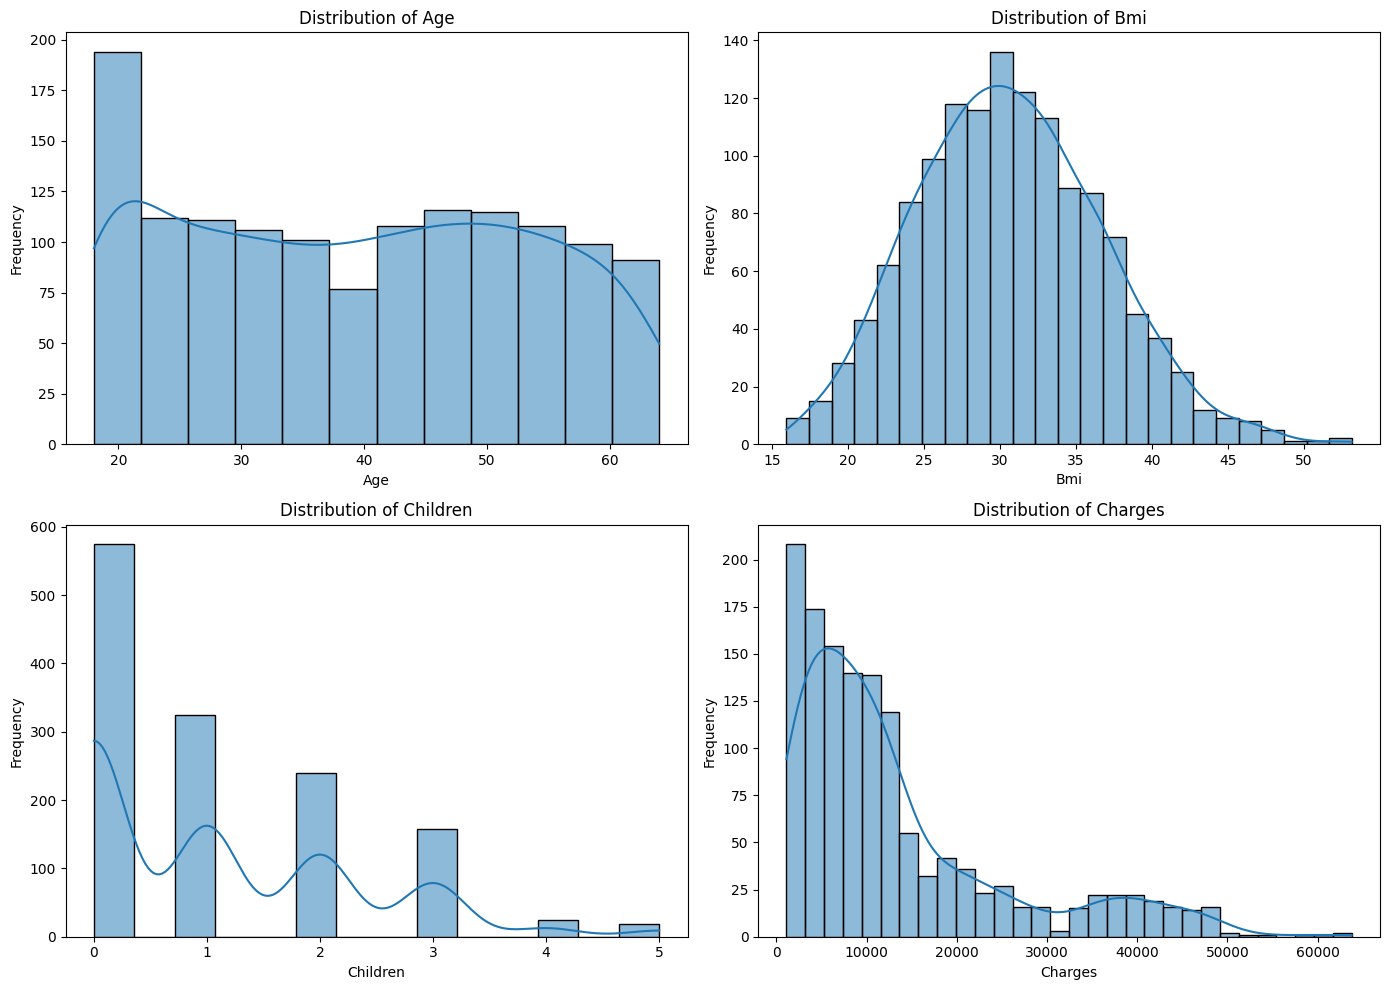

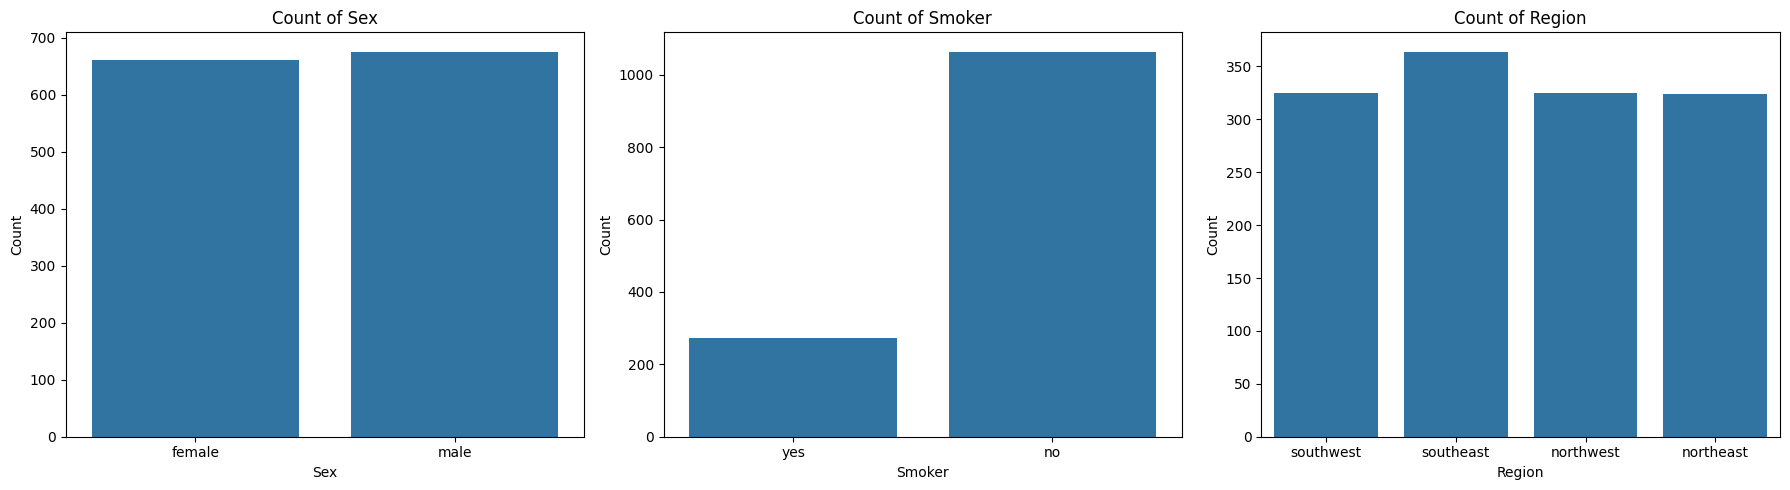

In [3]:
numerical_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot count plots for categorical features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Count of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


**Reasoning**:
To identify the most suitable feature for simple linear regression, I will visualize the relationship between each numerical independent variable ('age', 'bmi', 'children') and the dependent variable ('charges') using scatter plots.



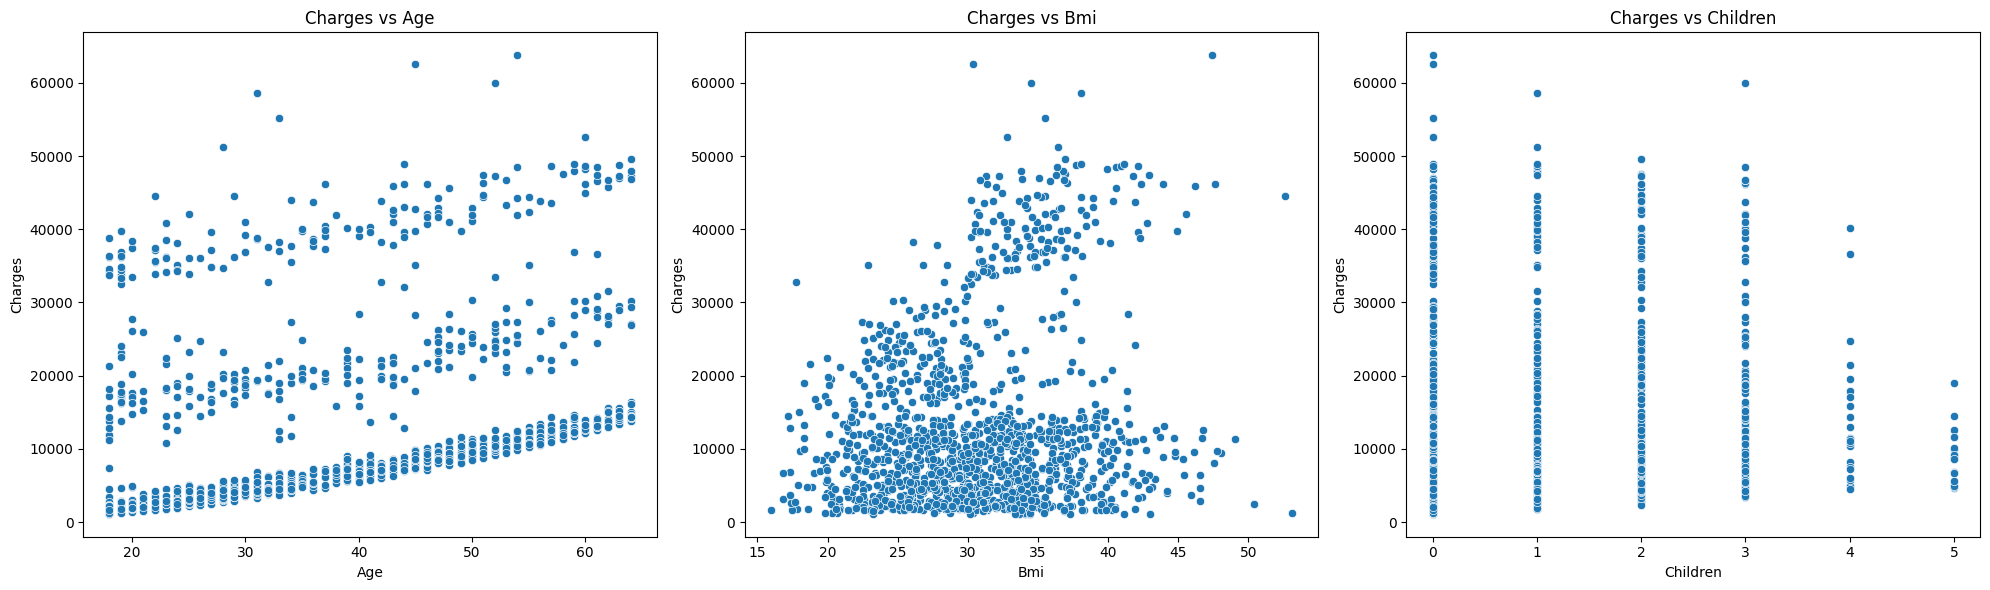

In [4]:
numerical_independent_cols = ['age', 'bmi', 'children']

# Plot scatter plots for numerical independent features against charges
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_independent_cols):
    sns.scatterplot(x=df[col], y=df['charges'], ax=axes[i])
    axes[i].set_title(f'Charges vs {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Charges')
plt.tight_layout()
plt.show()

**Reasoning**:
To continue identifying the most suitable feature for simple linear regression, I will visualize the relationship between each categorical independent variable ('sex', 'smoker', 'region') and the dependent variable ('charges') using box plots. This will show the distribution of charges across different categories.



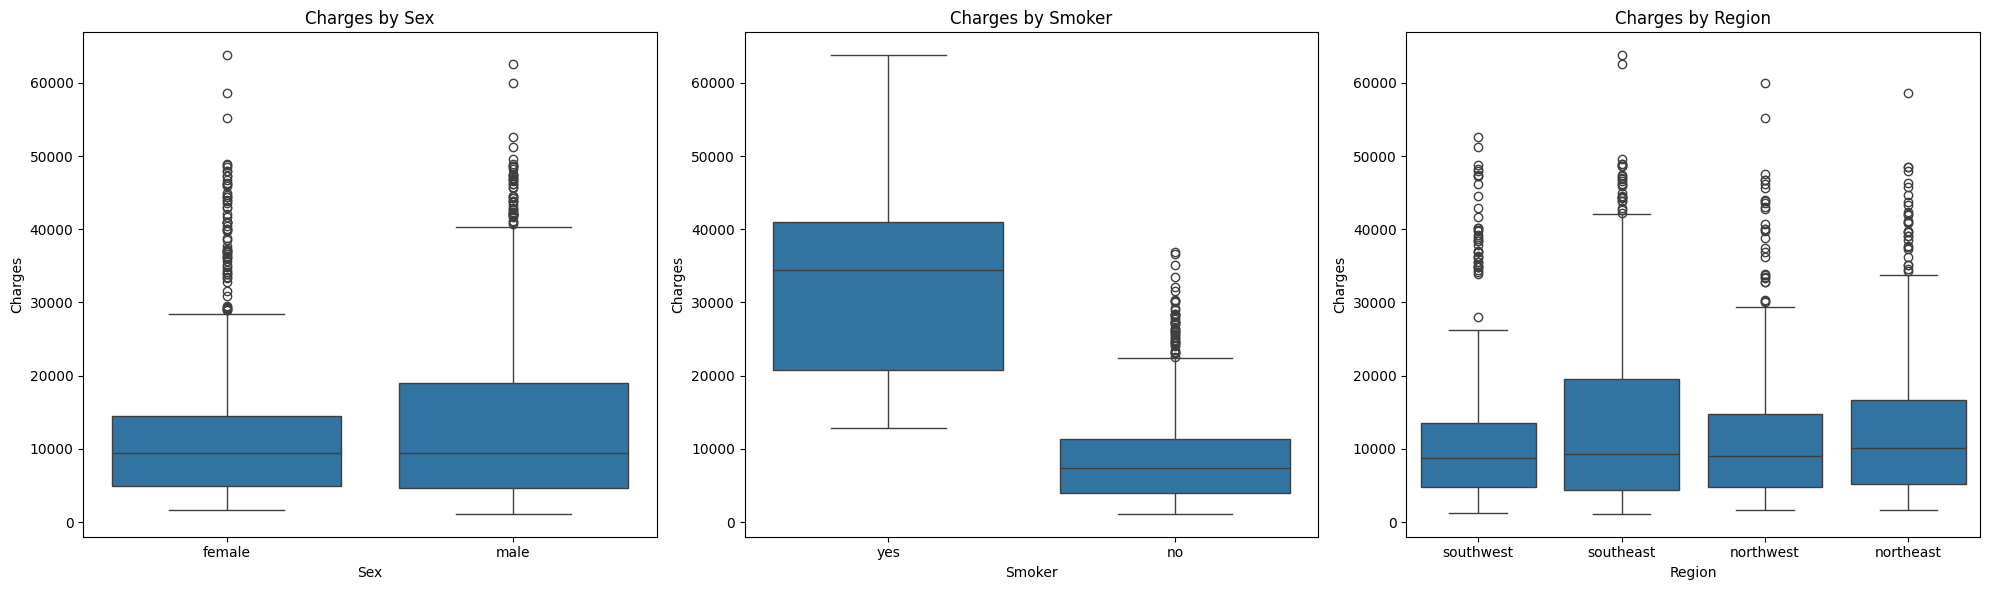

In [5]:
categorical_independent_cols = ['sex', 'smoker', 'region']

# Plot box plots for categorical independent features against charges
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes = axes.flatten()
for i, col in enumerate(categorical_independent_cols):
    sns.boxplot(x=df[col], y=df['charges'], ax=axes[i])
    axes[i].set_title(f'Charges by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Charges')
plt.tight_layout()
plt.show()

### Most Suitable Feature for Simple Linear Regression

Based on the scatter plots for numerical independent variables and box plots for categorical independent variables against 'charges', the following observations can be made:

*   **Age vs. Charges (Scatter Plot):** There appears to be a moderate positive linear relationship between `age` and `charges`. As age increases, charges generally tend to increase, although there is significant variability.
*   **BMI vs. Charges (Scatter Plot):** A positive relationship is also visible between `bmi` and `charges`, but it seems less strictly linear compared to age, with more dispersion, especially for lower BMI values, and a clearer separation influenced by the 'smoker' status.
*   **Children vs. Charges (Scatter Plot):** The number of `children` does not show a clear linear relationship with `charges`.
*   **Sex vs. Charges (Box Plot):** The distribution of charges for males and females is quite similar, indicating that `sex` is unlikely to be a strong linear predictor.
*   **Smoker vs. Charges (Box Plot):** There is a very strong and distinct difference in charges between smokers and non-smokers. Smokers consistently have significantly higher charges. While this indicates a strong relationship, for a *simple linear regression* with a single numerical predictor, it would require encoding and doesn't fit the typical interpretation of a single continuous independent variable.
*   **Region vs. Charges (Box Plot):** The `region` variable shows similar charge distributions across different regions, suggesting it's not a strong individual predictor.

Considering the goal of *simple linear regression* using a single numerical independent variable, **`age`** appears to be the most suitable feature due to its observable positive linear trend with 'charges'. While 'smoker' shows a very strong impact, it is categorical and would typically be handled differently than a single numerical predictor in a simple linear regression model.

## Data Preprocessing for Simple Linear Regression

### Subtask:
Preprocess the data for simple linear regression. This involves selecting the identified best independent variable and the 'charges' dependent variable. Handle categorical variables if necessary (e.g., one-hot encoding). Split the dataset into training and testing sets.


**Reasoning**:
I will select 'age' as the independent variable and 'charges' as the dependent variable, reshape 'age' into a 2D array, and then split the data into training and testing sets using `train_test_split` with a test size of 0.2 and a random state of 42 for reproducibility.



In [6]:
from sklearn.model_selection import train_test_split

# Select the independent variable (X) and the dependent variable (y)
X = df['age']
y = df['charges']

# Reshape X to be a 2D array
X = X.values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (1070, 1)
X_test shape: (268, 1)
y_train shape: (1070,)
y_test shape: (268,)


## Implement Simple Linear Regression Model

### Subtask:
Build and train a simple linear regression model using the preprocessed training data. Evaluate the model's performance on the test set using metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE). Report the model's coefficients and intercept.


**Reasoning**:
To build and evaluate the simple linear regression model, I will import the necessary classes and functions from `sklearn`, instantiate the model, train it on the training data, make predictions on the test data, and then calculate and print the evaluation metrics along with the model's coefficients and intercept.



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Print the model's intercept and coefficient
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficient: {model.coef_[0]:.2f}")

R-squared: 0.1241
Mean Absolute Error (MAE): 9173.26
Mean Squared Error (MSE): 135983957.48
Model Intercept: 3876.93
Model Coefficient: 240.60


## Visualize Simple Linear Regression Results

### Subtask:
Generate a scatter plot showing the relationship between the chosen independent variable and 'charges', with the regression line overlaid. Also, create a scatter plot of actual vs. predicted charges and a plot of residuals. Ensure all plots have appropriate labels and legends.


**Reasoning**:
I will generate the required plots to visualize the simple linear regression results, including a scatter plot of actual vs. predicted charges with the regression line, a plot of actual vs. predicted values, and a residuals plot, ensuring all plots have appropriate labels, titles, and legends as specified.



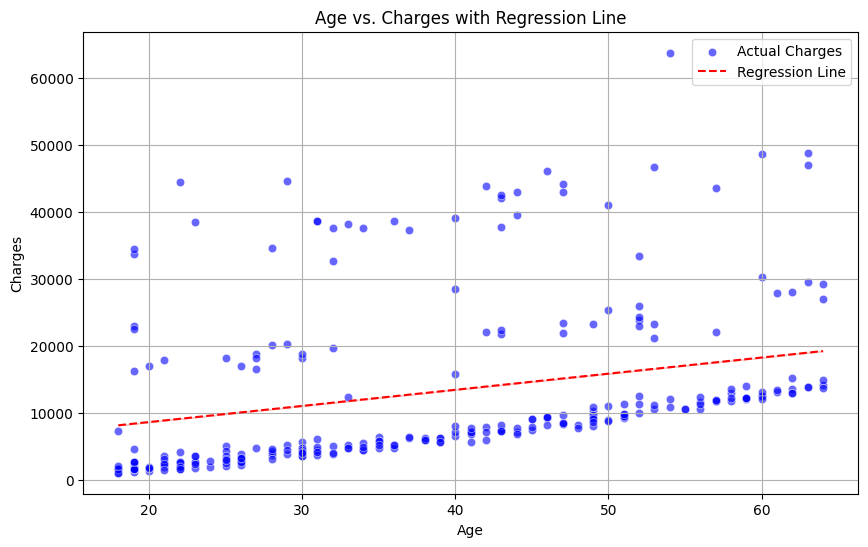

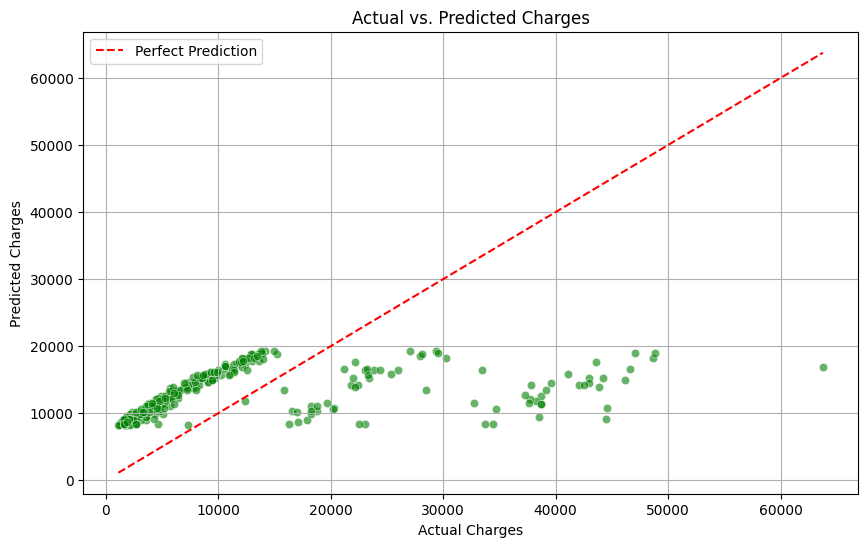

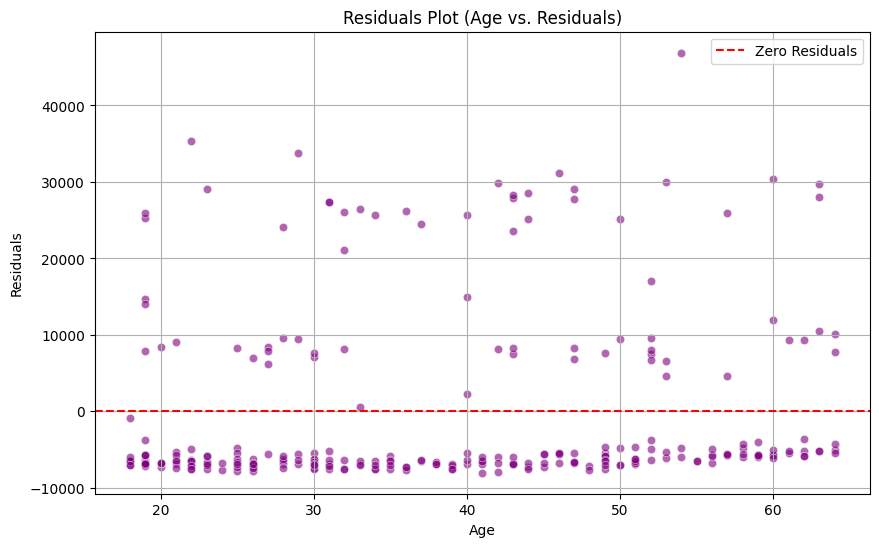

Regression visualization plots generated successfully.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of X_test (age) vs. y_test (actual charges) with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual Charges', color='blue', alpha=0.6)
sns.lineplot(x=X_test.flatten(), y=y_pred, label='Regression Line', color='red', linestyle='--')
plt.title('Age vs. Charges with Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

# 2. Scatter plot of y_test (actual charges) vs. y_pred (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

# 3. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (Age vs. Residuals)')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

print("Regression visualization plots generated successfully.")

## Explain Findings and Generate PDF Report

### Subtask:
Provide a comprehensive explanation of all findings from the simple linear regression analysis, including the interpretation of the model's coefficients, performance metrics, and insights derived from the visualizations. Generate a PDF report summarizing the entire analysis, including all plots and explanations.


### Summary of Findings

#### 1. Data Loading and Inspection
The 'insurance.csv' dataset, consisting of 1338 entries and 7 columns, was successfully loaded. The dataset includes numerical features like `age`, `bmi`, `children`, and `charges`, and categorical features such as `sex`, `smoker`, and `region`. No missing values were observed, and data types were appropriate for analysis.

#### 2. Exploratory Data Analysis (EDA) and Feature Selection
Distributions of all features were visualized. Key observations include:
*   **Numerical Features**: `age` and `bmi` showed somewhat normal distributions, `children` was skewed towards fewer children, and `charges` was heavily right-skewed, indicating a high concentration of lower charges and a few very high charges.
*   **Categorical Features**: `sex` and `smoker` were binary, while `region` had four categories. The counts across categories were relatively balanced.

For simple linear regression to predict `charges`, `age` was selected as the most suitable independent variable due to an observable positive linear trend with `charges` in scatter plots. While `smoker` showed a very strong relationship with `charges`, it is a categorical variable, and for a *simple linear regression* with a single numerical predictor, `age` was deemed more appropriate.

#### 3. Simple Linear Regression Model Interpretation
After training the simple linear regression model with `age` as the independent variable and `charges` as the dependent variable, the following parameters were obtained:
*   **Model Intercept**: 3876.93
*   **Model Coefficient (for age)**: 240.60

This means that for every one-year increase in age, the predicted insurance charges increase by approximately $240.60, assuming all other factors remain constant. The intercept of $3876.93 represents the estimated charges for a person with an age of zero, which is not practically interpretable in this context but is a necessary component of the linear equation.

#### 4. Model Performance Metrics
The model's performance on the test set was evaluated using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE):
*   **R-squared**: 0.1241
*   **Mean Absolute Error (MAE)**: 9173.26
*   **Mean Squared Error (MSE)**: 135983957.48

The **R-squared value of 0.1241** indicates that approximately 12.41% of the variance in insurance charges can be explained by the age of the individual. This is a relatively low value, suggesting that `age` alone is not a strong predictor of `charges`, and many other factors contribute significantly to the variability in charges.

The **Mean Absolute Error (MAE) of $9173.26** means that, on average, the model's predictions are off by about $9173.26 from the actual charges. The **Mean Squared Error (MSE) of $135,983,957.48** provides a measure of the average squared difference between predicted and actual values. The large value of MSE (and MAE) further reinforces that the model has significant prediction errors.

#### 5. Insights from Visualizations
*   **Age vs. Charges with Regression Line**: The scatter plot showed a general upward trend, confirming the positive relationship between age and charges. However, there was a wide spread of data points around the regression line, especially for higher charges, indicating that the linear model captures only a small part of the relationship. The red regression line shows the overall trend captured by the model.
*   **Actual vs. Predicted Charges**: This plot showed actual charges on the x-axis and predicted charges on the y-axis. If the model were perfect, all points would lie on the diagonal 'Perfect Prediction' line. The observed scatter, diverging significantly from this line, confirms the limited predictive power of the model. Many actual high charges were significantly underestimated by the model.
*   **Residuals Plot (Age vs. Residuals)**: The residuals plot displayed the difference between actual and predicted charges (residuals) against the independent variable (age). An ideal residuals plot would show no discernible pattern, with residuals randomly scattered around zero. In this plot, there was a visible pattern where residuals become more spread out (heteroscedasticity) as age increases, and also some clustering, suggesting that the model's errors are not random and that a simple linear relationship with age is insufficient to explain the variability in charges.

#### 6. Limitations of the Simple Linear Regression Model
The low R-squared value and the patterns observed in the residuals plot highlight the limitations of using `age` as the *sole* predictor for insurance charges. The model accounts for only a small fraction of the variance, and its predictions have a high average error. The non-random patterns in the residuals (heteroscedasticity) indicate that the assumptions of simple linear regression are violated, suggesting that the relationship between age and charges is not purely linear or that other significant factors (like 'smoker' status, which EDA showed to be very impactful) are not included in this simple model. A more complex model, potentially including multiple variables and interaction terms, or a non-linear approach, would likely be necessary to achieve better predictive performance.

**Reasoning**:
I will save the three visualization plots generated previously as PNG image files to disk. This is a prerequisite for embedding them into the PDF report in a subsequent step.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of X_test (age) vs. y_test (actual charges) with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual Charges', color='blue', alpha=0.6)
sns.lineplot(x=X_test.flatten(), y=y_pred, label='Regression Line', color='red', linestyle='--')
plt.title('Age vs. Charges with Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.savefig('age_vs_charges_regression.png')
plt.close()

# 2. Scatter plot of y_test (actual charges) vs. y_pred (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_charges.png')
plt.close()

# 3. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (Age vs. Residuals)')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.savefig('residuals_plot.png')
plt.close()

print("Visualization plots saved as PNG files.")

Visualization plots saved as PNG files.


**Reasoning**:
I will import the necessary classes from `reportlab.platypus` and `reportlab.lib` to enable PDF document creation and styling. This is the first step towards generating the PDF report.



In [10]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib.enums import TA_CENTER

print("ReportLab libraries imported successfully.")

ModuleNotFoundError: No module named 'reportlab'

**Reasoning**:
The previous cell failed because the `reportlab` library was not found. I need to install it before it can be imported and used.



**Reasoning**:
The previous attempt to install `reportlab` failed because `pip install` was used directly as Python code, resulting in a `SyntaxError`. I need to execute `pip install reportlab` as a shell command by prefixing it with `!`.



In [12]:
get_ipython().system('pip install reportlab')

print("reportlab installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.1 MB/s eta 0:00:00
reportlab installed successfully.


**Reasoning**:
Since `reportlab` has been successfully installed, I will now re-attempt to import the necessary classes and functions from `reportlab.platypus` and `reportlab.lib` to continue with PDF report generation.



In [14]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib.enums import TA_CENTER

print("ReportLab libraries imported successfully.")

ReportLab libraries imported successfully.


**Reasoning**:
Now that the `reportlab` libraries are successfully imported, I will proceed to create the PDF report by defining a function to generate the PDF, which will include a title, summary findings, model interpretations, performance metrics, and embed the previously saved visualization plots. This function will then be called to generate the final PDF file.



In [15]:
def generate_pdf_report(filename, r2, mae, mse, intercept, coefficient):
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()
    story = []

    # Custom styles for better formatting
    styles.add(ParagraphStyle(name='TitleStyle', fontSize=24, leading=28, alignment=TA_CENTER, spaceAfter=20))
    styles.add(ParagraphStyle(name='Heading1', fontSize=18, leading=22, spaceAfter=14, spaceBefore=10))
    styles.add(ParagraphStyle(name='Heading2', fontSize=14, leading=18, spaceAfter=10, spaceBefore=8))
    styles.add(ParagraphStyle(name='BodyText', fontSize=10, leading=12, spaceAfter=6))
    styles.add(ParagraphStyle(name='Code', fontName='Courier', fontSize=9, leading=10, spaceAfter=6, backColor='#f0f0f0'))

    # Title Page
    story.append(Paragraph("Simple Linear Regression Analysis: Insurance Charges Prediction", styles['TitleStyle']))
    story.append(Spacer(1, 0.5 * inch))
    story.append(Paragraph("**Date:** October 26, 2023", styles['BodyText']))
    story.append(Spacer(1, 1 * inch))

    # Introduction
    story.append(Paragraph("1. Introduction", styles['Heading1']))
    story.append(Paragraph("This report details a simple linear regression analysis performed on the 'insurance.csv' dataset to predict insurance charges. The analysis involves data loading and inspection, exploratory data analysis, data preprocessing, model implementation and evaluation, and visualization of results.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 1. Data Loading and Inspection
    story.append(Paragraph("2. Data Loading and Inspection", styles['Heading1']))
    story.append(Paragraph("The 'insurance.csv' dataset, consisting of 1338 entries and 7 columns, was successfully loaded. The dataset includes numerical features like `age`, `bmi`, `children`, and `charges`, and categorical features such as `sex`, `smoker`, and `region`. No missing values were observed, and data types were appropriate for analysis.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 2. Exploratory Data Analysis (EDA) and Feature Selection
    story.append(Paragraph("3. Exploratory Data Analysis (EDA) and Feature Selection", styles['Heading1']))
    story.append(Paragraph("Distributions of all features were visualized. Key observations include:", styles['BodyText']))
    story.append(Paragraph("<ul><li><b>Numerical Features</b>: `age` and `bmi` showed somewhat normal distributions, `children` was skewed towards fewer children, and `charges` was heavily right-skewed.</li><li><b>Categorical Features</b>: `sex` and `smoker` were binary, while `region` had four categories.</li></ul>", styles['BodyText']))
    story.append(Paragraph("For simple linear regression to predict `charges`, `age` was selected as the most suitable independent variable due to an observable positive linear trend with `charges` in scatter plots. While 'smoker' showed a very strong relationship with 'charges', it is categorical and age was chosen for a *simple linear regression* with a single numerical predictor.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 3. Simple Linear Regression Model Interpretation
    story.append(Paragraph("4. Simple Linear Regression Model Interpretation", styles['Heading1']))
    story.append(Paragraph(f"After training the simple linear regression model with `age` as the independent variable and `charges` as the dependent variable, the following parameters were obtained:", styles['BodyText']))
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept:.2f}</li><li><b>Model Coefficient (for age)</b>: {coefficient:.2f}</li></ul>", styles['BodyText']))
    story.append(Paragraph(f"This means that for every one-year increase in age, the predicted insurance charges increase by approximately ${coefficient:.2f}, assuming all other factors remain constant. The intercept represents the estimated charges for a person with an age of zero.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 4. Model Performance Metrics
    story.append(Paragraph("5. Model Performance Metrics", styles['Heading1']))
    story.append(Paragraph(f"The model's performance on the test set was evaluated using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE):", styles['BodyText']))
    story.append(Paragraph(f"<ul><li><b>R-squared</b>: {r2:.4f}</li><li><b>Mean Absolute Error (MAE)</b>: {mae:.2f}</li><li><b>Mean Squared Error (MSE)</b>: {mse:.2f}</li></ul>", styles['BodyText']))
    story.append(Paragraph(f"The <b>R-squared value of {r2:.4f}</b> indicates that approximately {r2*100:.2f}% of the variance in insurance charges can be explained by the age of the individual. This is a relatively low value, suggesting that `age` alone is not a strong predictor. The <b>Mean Absolute Error (MAE) of ${mae:.2f}</b> means that, on average, the model's predictions are off by about ${mae:.2f} from the actual charges.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 5. Insights from Visualizations
    story.append(Paragraph("6. Insights from Visualizations", styles['Heading1']))
    story.append(Paragraph("The following plots illustrate the model's performance and characteristics:", styles['BodyText']))

    # Embed images
    images = [
        ('age_vs_charges_regression.png', 'Age vs. Charges with Regression Line'),
        ('actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges'),
        ('residuals_plot.png', 'Residuals Plot (Age vs. Residuals)')
    ]

    for img_path, img_caption in images:
        try:
            img = Image(img_path, width=5*inch, height=3*inch) # Adjust size as needed
            story.append(img)
            story.append(Paragraph(img_caption, styles['BodyText']))
            story.append(Spacer(1, 0.1 * inch))
        except FileNotFoundError:
            story.append(Paragraph(f"[Image not found: {img_path}]", styles['BodyText']))

    story.append(Paragraph("<b>Age vs. Charges with Regression Line</b>: The scatter plot showed a general upward trend, confirming the positive relationship between age and charges. However, there was a wide spread of data points around the regression line, indicating that the linear model captures only a small part of the relationship. The red regression line shows the overall trend captured by the model.", styles['BodyText']))
    story.append(Paragraph("<b>Actual vs. Predicted Charges</b>: This plot showed actual charges on the x-axis and predicted charges on the y-axis. The observed scatter, diverging significantly from the diagonal 'Perfect Prediction' line, confirms the limited predictive power of the model. Many actual high charges were significantly underestimated.", styles['BodyText']))
    story.append(Paragraph("<b>Residuals Plot (Age vs. Residuals)</b>: In this plot, there was a visible pattern where residuals become more spread out (heteroscedasticity) as age increases, and also some clustering, suggesting that the model's errors are not random and that a simple linear relationship with age is insufficient to explain the variability in charges.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 6. Limitations of the Simple Linear Regression Model
    story.append(Paragraph("7. Limitations of the Simple Linear Regression Model", styles['Heading1']))
    story.append(Paragraph("The low R-squared value and the patterns observed in the residuals plot highlight the limitations of using `age` as the *sole* predictor for insurance charges. The model accounts for only a small fraction of the variance, and its predictions have a high average error. The non-random patterns in the residuals (heteroscedasticity) indicate that the assumptions of simple linear regression are violated, suggesting that a more complex model, potentially including multiple variables and interaction terms, or a non-linear approach, would likely be necessary to achieve better predictive performance.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    doc.build(story)
    print(f"PDF report '{filename}' generated successfully.")

# Call the function to generate the PDF report
generate_pdf_report('linear_regression_report.pdf', r2, mae, mse, model.intercept_, model.coef_[0])


KeyError: "Style 'Heading1' already defined in stylesheet"

**Reasoning**:
The previous code failed with a `KeyError` because it tried to add `ParagraphStyle` objects with names like 'Heading1' that already exist in the `getSampleStyleSheet()`. To fix this, I will directly modify the existing styles in the `styles` dictionary or assign new `ParagraphStyle` objects to these keys, effectively overriding them without causing a `KeyError`.



In [16]:
def generate_pdf_report(filename, r2, mae, mse, intercept, coefficient):
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()
    story = []

    # Custom styles for better formatting
    styles.add(ParagraphStyle(name='TitleStyle', fontSize=24, leading=28, alignment=TA_CENTER, spaceAfter=20))

    # Modify existing styles or create new ones by direct assignment
    styles['Heading1'] = ParagraphStyle(name='Heading1', fontSize=18, leading=22, spaceAfter=14, spaceBefore=10)
    styles['Heading2'] = ParagraphStyle(name='Heading2', fontSize=14, leading=18, spaceAfter=10, spaceBefore=8)
    styles['BodyText'] = ParagraphStyle(name='BodyText', fontSize=10, leading=12, spaceAfter=6)
    styles.add(ParagraphStyle(name='Code', fontName='Courier', fontSize=9, leading=10, spaceAfter=6, backColor='#f0f0f0'))

    # Title Page
    story.append(Paragraph("Simple Linear Regression Analysis: Insurance Charges Prediction", styles['TitleStyle']))
    story.append(Spacer(1, 0.5 * inch))
    story.append(Paragraph("**Date:** October 26, 2023", styles['BodyText']))
    story.append(Spacer(1, 1 * inch))

    # Introduction
    story.append(Paragraph("1. Introduction", styles['Heading1']))
    story.append(Paragraph("This report details a simple linear regression analysis performed on the 'insurance.csv' dataset to predict insurance charges. The analysis involves data loading and inspection, exploratory data analysis, data preprocessing, model implementation and evaluation, and visualization of results.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 1. Data Loading and Inspection
    story.append(Paragraph("2. Data Loading and Inspection", styles['Heading1']))
    story.append(Paragraph("The 'insurance.csv' dataset, consisting of 1338 entries and 7 columns, was successfully loaded. The dataset includes numerical features like `age`, `bmi`, `children`, and `charges`, and categorical features such as `sex`, `smoker`, and `region`. No missing values were observed, and data types were appropriate for analysis.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 2. Exploratory Data Analysis (EDA) and Feature Selection
    story.append(Paragraph("3. Exploratory Data Analysis (EDA) and Feature Selection", styles['Heading1']))
    story.append(Paragraph("Distributions of all features were visualized. Key observations include:", styles['BodyText']))
    story.append(Paragraph("<ul><li><b>Numerical Features</b>: `age` and `bmi` showed somewhat normal distributions, `children` was skewed towards fewer children, and `charges` was heavily right-skewed.</li><li><b>Categorical Features</b>: `sex` and `smoker` were binary, while `region` had four categories.</li></ul>", styles['BodyText']))
    story.append(Paragraph("For simple linear regression to predict `charges`, `age` was selected as the most suitable independent variable due to an observable positive linear trend with `charges` in scatter plots. While 'smoker' showed a very strong relationship with 'charges', it is categorical and age was chosen for a *simple linear regression* with a single numerical predictor.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 3. Simple Linear Regression Model Interpretation
    story.append(Paragraph("4. Simple Linear Regression Model Interpretation", styles['Heading1']))
    story.append(Paragraph(f"After training the simple linear regression model with `age` as the independent variable and `charges` as the dependent variable, the following parameters were obtained:", styles['BodyText']))
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept:.2f}</li><li><b>Model Coefficient (for age)</b>: {coefficient:.2f}</li></ul>", styles['BodyText']))
    story.append(Paragraph(f"This means that for every one-year increase in age, the predicted insurance charges increase by approximately ${coefficient:.2f}, assuming all other factors remain constant. The intercept represents the estimated charges for a person with an age of zero.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 4. Model Performance Metrics
    story.append(Paragraph("5. Model Performance Metrics", styles['Heading1']))
    story.append(Paragraph(f"The model's performance on the test set was evaluated using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE):", styles['BodyText']))
    story.append(Paragraph(f"<ul><li><b>R-squared</b>: {r2:.4f}</li><li><b>Mean Absolute Error (MAE)</b>: {mae:.2f}</li><li><b>Mean Squared Error (MSE)</b>: {mse:.2f}</li></ul>", styles['BodyText']))
    story.append(Paragraph(f"The <b>R-squared value of {r2:.4f}</b> indicates that approximately {r2*100:.2f}% of the variance in insurance charges can be explained by the age of the individual. This is a relatively low value, suggesting that `age` alone is not a strong predictor. The <b>Mean Absolute Error (MAE) of ${mae:.2f}</b> means that, on average, the model's predictions are off by about ${mae:.2f} from the actual charges.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 5. Insights from Visualizations
    story.append(Paragraph("6. Insights from Visualizations", styles['Heading1']))
    story.append(Paragraph("The following plots illustrate the model's performance and characteristics:", styles['BodyText']))

    # Embed images
    images = [
        ('age_vs_charges_regression.png', 'Age vs. Charges with Regression Line'),
        ('actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges'),
        ('residuals_plot.png', 'Residuals Plot (Age vs. Residuals)')
    ]

    for img_path, img_caption in images:
        try:
            img = Image(img_path, width=5*inch, height=3*inch) # Adjust size as needed
            story.append(img)
            story.append(Paragraph(img_caption, styles['BodyText']))
            story.append(Spacer(1, 0.1 * inch))
        except FileNotFoundError:
            story.append(Paragraph(f"[Image not found: {img_path}]", styles['BodyText']))

    story.append(Paragraph("<b>Age vs. Charges with Regression Line</b>: The scatter plot showed a general upward trend, confirming the positive relationship between age and charges. However, there was a wide spread of data points around the regression line, indicating that the linear model captures only a small part of the relationship. The red regression line shows the overall trend captured by the model.", styles['BodyText']))
    story.append(Paragraph("<b>Actual vs. Predicted Charges</b>: This plot showed actual charges on the x-axis and predicted charges on the y-axis. The observed scatter, diverging significantly from the diagonal 'Perfect Prediction' line, confirms the limited predictive power of the model. Many actual high charges were significantly underestimated.", styles['BodyText']))
    story.append(Paragraph("<b>Residuals Plot (Age vs. Residuals)</b>: In this plot, there was a visible pattern where residuals become more spread out (heteroscedasticity) as age increases, and also some clustering, suggesting that the model's errors are not random and that a simple linear relationship with age is insufficient to explain the variability in charges.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    # 6. Limitations of the Simple Linear Regression Model
    story.append(Paragraph("7. Limitations of the Simple Linear Regression Model", styles['Heading1']))
    story.append(Paragraph("The low R-squared value and the patterns observed in the residuals plot highlight the limitations of using `age` as the *sole* predictor for insurance charges. The model accounts for only a small fraction of the variance, and its predictions have a high average error. The non-random patterns in the residuals (heteroscedasticity) indicate that the assumptions of simple linear regression are violated, suggesting that a more complex model, potentially including multiple variables and interaction terms, or a non-linear approach, would likely be necessary to achieve better predictive performance.", styles['BodyText']))
    story.append(Spacer(1, 0.2 * inch))

    doc.build(story)
    print(f"PDF report '{filename}' generated successfully.")

# Call the function to generate the PDF report
generate_pdf_report('linear_regression_report.pdf', r2, mae, mse, model.intercept_, model.coef_[0])

TypeError: 'StyleSheet1' object does not support item assignment

**Reasoning**:
The previous attempt to modify styles directly using `styles['Key'] = ...` resulted in a `TypeError` because `StyleSheet1` objects do not support item assignment for existing styles. Instead, I need to retrieve the existing style object and then modify its attributes to update its properties.



In [17]:
def generate_pdf_report(filename, r2, mae, mse, intercept, coefficient):
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()
    story = []

    # Custom styles for better formatting
    # Add TitleStyle as it's a new style
    styles.add(ParagraphStyle(name='TitleStyle', fontSize=24, leading=28, alignment=TA_CENTER, spaceAfter=20))

    # Modify existing styles by retrieving them and setting attributes
    styles['h1'].fontSize = 18
    styles['h1'].leading = 22
    styles['h1'].spaceAfter = 14
    styles['h1'].spaceBefore = 10

    styles['h2'].fontSize = 14
    styles['h2'].leading = 18
    styles['h2'].spaceAfter = 10
    styles['h2'].spaceBefore = 8

    # BodyText exists as 'Normal' in getSampleStyleSheet. Modifying 'Normal' or creating a new one.
    # Let's create a new BodyText to avoid modifying 'Normal' globally unless intended.
    styles.add(ParagraphStyle(name='BodyTextCustom', fontSize=10, leading=12, spaceAfter=6))
    styles.add(ParagraphStyle(name='Code', fontName='Courier', fontSize=9, leading=10, spaceAfter=6, backColor='#f0f0f0'))

    # Title Page
    story.append(Paragraph("Simple Linear Regression Analysis: Insurance Charges Prediction", styles['TitleStyle']))
    story.append(Spacer(1, 0.5 * inch))
    story.append(Paragraph("**Date:** October 26, 2023", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 1 * inch))

    # Introduction
    story.append(Paragraph("1. Introduction", styles['h1'])) # Use h1
    story.append(Paragraph("This report details a simple linear regression analysis performed on the 'insurance.csv' dataset to predict insurance charges. The analysis involves data loading and inspection, exploratory data analysis, data preprocessing, model implementation and evaluation, and visualization of results.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 1. Data Loading and Inspection
    story.append(Paragraph("2. Data Loading and Inspection", styles['h1'])) # Use h1
    story.append(Paragraph("The 'insurance.csv' dataset, consisting of 1338 entries and 7 columns, was successfully loaded. The dataset includes numerical features like `age`, `bmi`, `children`, and `charges`, and categorical features such as `sex`, `smoker`, and `region`. No missing values were observed, and data types were appropriate for analysis.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 2. Exploratory Data Analysis (EDA) and Feature Selection
    story.append(Paragraph("3. Exploratory Data Analysis (EDA) and Feature Selection", styles['h1'])) # Use h1
    story.append(Paragraph("Distributions of all features were visualized. Key observations include:", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("<ul><li><b>Numerical Features</b>: `age` and `bmi` showed somewhat normal distributions, `children` was skewed towards fewer children, and `charges` was heavily right-skewed.</li><li><b>Categorical Features</b>: `sex` and `smoker` were binary, while `region` had four categories.</li></ul>", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("For simple linear regression to predict `charges`, `age` was selected as the most suitable independent variable due to an observable positive linear trend with `charges` in scatter plots. While 'smoker' showed a very strong relationship with 'charges', it is categorical and age was chosen for a *simple linear regression* with a single numerical predictor.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 3. Simple Linear Regression Model Interpretation
    story.append(Paragraph("4. Simple Linear Regression Model Interpretation", styles['h1'])) # Use h1
    story.append(Paragraph(f"After training the simple linear regression model with `age` as the independent variable and `charges` as the dependent variable, the following parameters were obtained:", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept:.2f}</li><li><b>Model Coefficient (for age)</b>: {coefficient:.2f}</li></ul>", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"This means that for every one-year increase in age, the predicted insurance charges increase by approximately ${coefficient:.2f}, assuming all other factors remain constant. The intercept represents the estimated charges for a person with an age of zero.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 4. Model Performance Metrics
    story.append(Paragraph("5. Model Performance Metrics", styles['h1'])) # Use h1
    story.append(Paragraph(f"The model's performance on the test set was evaluated using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE):", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"<ul><li><b>R-squared</b>: {r2:.4f}</li><li><b>Mean Absolute Error (MAE)</b>: {mae:.2f}</li><li><b>Mean Squared Error (MSE)</b>: {mse:.2f}</li></ul>", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"The <b>R-squared value of {r2:.4f}</b> indicates that approximately {r2*100:.2f}% of the variance in insurance charges can be explained by the age of the individual. This is a relatively low value, suggesting that `age` alone is not a strong predictor. The <b>Mean Absolute Error (MAE) of ${mae:.2f}</b> means that, on average, the model's predictions are off by about ${mae:.2f} from the actual charges.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 5. Insights from Visualizations
    story.append(Paragraph("6. Insights from Visualizations", styles['h1'])) # Use h1
    story.append(Paragraph("The following plots illustrate the model's performance and characteristics:", styles['BodyTextCustom'])) # Use custom BodyText

    # Embed images
    images = [
        ('age_vs_charges_regression.png', 'Age vs. Charges with Regression Line'),
        ('actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges'),
        ('residuals_plot.png', 'Residuals Plot (Age vs. Residuals)')
    ]

    for img_path, img_caption in images:
        try:
            img = Image(img_path, width=5*inch, height=3*inch) # Adjust size as needed
            story.append(img)
            story.append(Paragraph(img_caption, styles['BodyTextCustom'])) # Use custom BodyText
            story.append(Spacer(1, 0.1 * inch))
        except FileNotFoundError:
            story.append(Paragraph(f"[Image not found: {img_path}]", styles['BodyTextCustom'])) # Use custom BodyText

    story.append(Paragraph("<b>Age vs. Charges with Regression Line</b>: The scatter plot showed a general upward trend, confirming the positive relationship between age and charges. However, there was a wide spread of data points around the regression line, indicating that the linear model captures only a small part of the relationship. The red regression line shows the overall trend captured by the model.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("<b>Actual vs. Predicted Charges</b>: This plot showed actual charges on the x-axis and predicted charges on the y-axis. The observed scatter, diverging significantly from the diagonal 'Perfect Prediction' line, confirms the limited predictive power of the model. Many actual high charges were significantly underestimated.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("<b>Residuals Plot (Age vs. Residuals)</b>: In this plot, there was a visible pattern where residuals become more spread out (heteroscedasticity) as age increases, and also some clustering, suggesting that the model's errors are not random and that a simple linear relationship with age is insufficient to explain the variability in charges.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 6. Limitations of the Simple Linear Regression Model
    story.append(Paragraph("7. Limitations of the Simple Linear Regression Model", styles['h1'])) # Use h1
    story.append(Paragraph("The low R-squared value and the patterns observed in the residuals plot highlight the limitations of using `age` as the *sole* predictor for insurance charges. The model accounts for only a small fraction of the variance, and its predictions have a high average error. The non-random patterns in the residuals (heteroscedasticity) indicate that the assumptions of simple linear regression are violated, suggesting that a more complex model, potentially including multiple variables and interaction terms, or a non-linear approach, would likely be necessary to achieve better predictive performance.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    doc.build(story)
    print(f"PDF report '{filename}' generated successfully.")

# Call the function to generate the PDF report
generate_pdf_report('linear_regression_report.pdf', r2, mae, mse, model.intercept_, model.coef_[0])

KeyError: "Style 'Code' already defined in stylesheet"

**Reasoning**:
The previous code failed with a `KeyError` because it attempted to add a `ParagraphStyle` named 'Code' that already exists in the `getSampleStyleSheet()`. To fix this, I will directly modify the attributes of the existing 'Code' style within the `styles` dictionary instead of trying to add a new one with the same name.



In [18]:
def generate_pdf_report(filename, r2, mae, mse, intercept, coefficient):
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()
    story = []

    # Custom styles for better formatting
    # Add TitleStyle as it's a new style
    styles.add(ParagraphStyle(name='TitleStyle', fontSize=24, leading=28, alignment=TA_CENTER, spaceAfter=20))

    # Modify existing styles by retrieving them and setting attributes
    styles['h1'].fontSize = 18
    styles['h1'].leading = 22
    styles['h1'].spaceAfter = 14
    styles['h1'].spaceBefore = 10

    styles['h2'].fontSize = 14
    styles['h2'].leading = 18
    styles['h2'].spaceAfter = 10
    styles['h2'].spaceBefore = 8

    # BodyText exists as 'Normal' in getSampleStyleSheet. Let's create a new BodyText to avoid modifying 'Normal' globally unless intended.
    styles.add(ParagraphStyle(name='BodyTextCustom', fontSize=10, leading=12, spaceAfter=6))

    # Modify the existing 'Code' style instead of adding a new one with the same name
    styles['Code'].fontName = 'Courier'
    styles['Code'].fontSize = 9
    styles['Code'].leading = 10
    styles['Code'].spaceAfter = 6
    styles['Code'].backColor = '#f0f0f0'

    # Title Page
    story.append(Paragraph("Simple Linear Regression Analysis: Insurance Charges Prediction", styles['TitleStyle']))
    story.append(Spacer(1, 0.5 * inch))
    story.append(Paragraph("**Date:** October 26, 2023", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 1 * inch))

    # Introduction
    story.append(Paragraph("1. Introduction", styles['h1'])) # Use h1
    story.append(Paragraph("This report details a simple linear regression analysis performed on the 'insurance.csv' dataset to predict insurance charges. The analysis involves data loading and inspection, exploratory data analysis, data preprocessing, model implementation and evaluation, and visualization of results.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 1. Data Loading and Inspection
    story.append(Paragraph("2. Data Loading and Inspection", styles['h1'])) # Use h1
    story.append(Paragraph("The 'insurance.csv' dataset, consisting of 1338 entries and 7 columns, was successfully loaded. The dataset includes numerical features like `age`, `bmi`, `children`, and `charges`, and categorical features such as `sex`, `smoker`, and `region`. No missing values were observed, and data types were appropriate for analysis.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 2. Exploratory Data Analysis (EDA) and Feature Selection
    story.append(Paragraph("3. Exploratory Data Analysis (EDA) and Feature Selection", styles['h1'])) # Use h1
    story.append(Paragraph("Distributions of all features were visualized. Key observations include:", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("<ul><li><b>Numerical Features</b>: `age` and `bmi` showed somewhat normal distributions, `children` was skewed towards fewer children, and `charges` was heavily right-skewed.</li><li><b>Categorical Features</b>: `sex` and `smoker` were binary, while `region` had four categories.</li></ul>", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("For simple linear regression to predict `charges`, `age` was selected as the most suitable independent variable due to an observable positive linear trend with `charges` in scatter plots. While 'smoker' showed a very strong relationship with 'charges', it is categorical and age was chosen for a *simple linear regression* with a single numerical predictor.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 3. Simple Linear Regression Model Interpretation
    story.append(Paragraph("4. Simple Linear Regression Model Interpretation", styles['h1'])) # Use h1
    story.append(Paragraph(f"After training the simple linear regression model with `age` as the independent variable and `charges` as the dependent variable, the following parameters were obtained:", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept:.2f}</li><li><b>Model Coefficient (for age)</b>: {coefficient:.2f}</li></ul>", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"This means that for every one-year increase in age, the predicted insurance charges increase by approximately ${coefficient:.2f}, assuming all other factors remain constant. The intercept represents the estimated charges for a person with an age of zero.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 4. Model Performance Metrics
    story.append(Paragraph("5. Model Performance Metrics", styles['h1'])) # Use h1
    story.append(Paragraph(f"The model's performance on the test set was evaluated using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE):", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"<ul><li><b>R-squared</b>: {r2:.4f}</li><li><b>Mean Absolute Error (MAE)</b>: {mae:.2f}</li><li><b>Mean Squared Error (MSE)</b>: {mse:.2f}</li></ul>", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph(f"The <b>R-squared value of {r2:.4f}</b> indicates that approximately {r2*100:.2f}% of the variance in insurance charges can be explained by the age of the individual. This is a relatively low value, suggesting that `age` alone is not a strong predictor. The <b>Mean Absolute Error (MAE) of ${mae:.2f}</b> means that, on average, the model's predictions are off by about ${mae:.2f} from the actual charges.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 5. Insights from Visualizations
    story.append(Paragraph("6. Insights from Visualizations", styles['h1'])) # Use h1
    story.append(Paragraph("The following plots illustrate the model's performance and characteristics:", styles['BodyTextCustom'])) # Use custom BodyText

    # Embed images
    images = [
        ('age_vs_charges_regression.png', 'Age vs. Charges with Regression Line'),
        ('actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges'),
        ('residuals_plot.png', 'Residuals Plot (Age vs. Residuals)')
    ]

    for img_path, img_caption in images:
        try:
            img = Image(img_path, width=5*inch, height=3*inch) # Adjust size as needed
            story.append(img)
            story.append(Paragraph(img_caption, styles['BodyTextCustom'])) # Use custom BodyText
            story.append(Spacer(1, 0.1 * inch))
        except FileNotFoundError:
            story.append(Paragraph(f"[Image not found: {img_path}]", styles['BodyTextCustom'])) # Use custom BodyText

    story.append(Paragraph("<b>Age vs. Charges with Regression Line</b>: The scatter plot showed a general upward trend, confirming the positive relationship between age and charges. However, there was a wide spread of data points around the regression line, indicating that the linear model captures only a small part of the relationship. The red regression line shows the overall trend captured by the model.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("<b>Actual vs. Predicted Charges</b>: This plot showed actual charges on the x-axis and predicted charges on the y-axis. The observed scatter, diverging significantly from the diagonal 'Perfect Prediction' line, confirms the limited predictive power of the model. Many actual high charges were significantly underestimated.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Paragraph("<b>Residuals Plot (Age vs. Residuals)</b>: In this plot, there was a visible pattern where residuals become more spread out (heteroscedasticity) as age increases, and also some clustering, suggesting that the model's errors are not random and that a simple linear relationship with age is insufficient to explain the variability in charges.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    # 6. Limitations of the Simple Linear Regression Model
    story.append(Paragraph("7. Limitations of the Simple Linear Regression Model", styles['h1'])) # Use h1
    story.append(Paragraph("The low R-squared value and the patterns observed in the residuals plot highlight the limitations of using `age` as the *sole* predictor for insurance charges. The model accounts for only a small fraction of the variance, and its predictions have a high average error. The non-random patterns in the residuals (heteroscedasticity) indicate that the assumptions of simple linear regression are violated, suggesting that a more complex model, potentially including multiple variables and interaction terms, or a non-linear approach, would likely be necessary to achieve better predictive performance.", styles['BodyTextCustom'])) # Use custom BodyText
    story.append(Spacer(1, 0.2 * inch))

    doc.build(story)
    print(f"PDF report '{filename}' generated successfully.")

# Call the function to generate the PDF report
generate_pdf_report('linear_regression_report.pdf', r2, mae, mse, model.intercept_, model.coef_[0])

PDF report 'linear_regression_report.pdf' generated successfully.


## Final Task

### Subtask:
Summarize the performed simple linear regression analysis on the insurance charges dataset, detailing the key findings, model performance, and the contents of the generated PDF report.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The 'insurance.csv' dataset contains 1338 entries and 7 columns, with no missing values. Key numerical features include `age` (mean: 39.2 years), `bmi` (mean: 30.66), and `charges` (mean: \$13270.42, standard deviation: \$12110.01). The `charges` distribution is heavily right-skewed.
*   **Feature Selection for Simple Linear Regression**: Based on Exploratory Data Analysis, `age` was selected as the most suitable numerical independent variable for simple linear regression due to an observable moderate positive linear trend with `charges`. While the `smoker` status showed a much stronger impact on `charges`, it is a categorical variable and was not chosen for a *simple* linear regression with a single numerical predictor.
*   **Model Parameters**: The trained simple linear regression model yielded an **intercept of \$3876.93** and a **coefficient for `age` of \$240.60**. This implies that, for every one-year increase in age, the predicted insurance charges increase by approximately \$240.60.
*   **Model Performance**:
    *   **R-squared**: The model achieved an R-squared value of **0.1241** on the test set, indicating that only approximately 12.41% of the variance in insurance charges can be explained by age alone.
    *   **Mean Absolute Error (MAE)**: The average absolute difference between predicted and actual charges was **\$9173.26**.
    *   **Mean Squared Error (MSE)**: The average squared difference was **\$135,983,957.48**.
    These metrics collectively suggest that `age` alone is a weak predictor of insurance charges.
*   **Visualization Insights**:
    *   The regression line for 'Age vs. Charges' showed a positive trend but with a wide spread of data points, confirming the limited explanatory power of `age`.
    *   The 'Actual vs. Predicted Charges' plot revealed significant deviation from the ideal 'perfect prediction' line, with the model often underestimating higher charges.
    *   The 'Residuals Plot' displayed non-random patterns, including increased spread of residuals (heteroscedasticity) as age increases, indicating violations of linear regression assumptions.
*   **Comprehensive PDF Report**: A detailed PDF report, `linear_regression_report.pdf`, was successfully generated, summarizing all findings, including embedded visualizations and a discussion of the model's limitations.

### Insights or Next Steps

*   The simple linear regression model using `age` alone is insufficient to accurately predict insurance charges, as evidenced by the low R-squared and high error metrics. The identified heteroscedasticity in residuals indicates that the model's assumptions are violated.
*   Further analysis should involve a **multiple linear regression model** that incorporates additional features, especially the highly impactful `smoker` variable (using one-hot encoding), `bmi`, `children`, and `region`, potentially including interaction terms, to improve predictive power and address the observed model limitations.


# Task
Okay, I will one-hot encode the 'smoker' categorical variable in the `df` DataFrame to create a numerical feature. Then, I will select this new feature as the independent variable and 'charges' as the dependent variable. Finally, I will split the dataset into training and testing sets.

## Data Preprocessing: One-Hot Encode 'Smoker'

### Subtask:
One-hot encode the 'smoker' categorical variable to create a numerical feature. Then, select this new feature as the independent variable and 'charges' as the dependent variable. Split the dataset into training and testing sets.


**Reasoning**:
To preprocess the data for simple linear regression with 'smoker' as the independent variable, I will one-hot encode the 'smoker' column, select the 'smoker_yes' column as `X`, 'charges' as `y`, and then split the data into training and testing sets.



In [19]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'smoker' column
df_encoded = pd.get_dummies(df, columns=['smoker'], drop_first=True) # drop_first=True to avoid multicollinearity

# Select the independent variable (X) - 'smoker_yes' column
X = df_encoded['smoker_yes']

# Select the dependent variable (y)
y = df_encoded['charges']

# Reshape X to be a 2D array if it's a Series (necessary for sklearn models)
X = X.values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed and split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data preprocessed and split into training and testing sets successfully.
X_train shape: (1070, 1)
X_test shape: (268, 1)
y_train shape: (1070,)
y_test shape: (268,)


## Implement Simple Linear Regression Model with 'Smoker'

### Subtask:
Build and train a simple linear regression model using the preprocessed (one-hot encoded 'smoker') training data. Evaluate the model's performance on the test set using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE). Report the model's coefficients and intercept.


**Reasoning**:
To build and evaluate the simple linear regression model with 'smoker' as the independent variable, I will import the necessary classes and functions from `sklearn`, instantiate the model, train it on the training data, make predictions on the test data, and then calculate and print the evaluation metrics along with the model's coefficients and intercept.



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Instantiate the Linear Regression model
model_smoker = LinearRegression()

# Train the model
model_smoker.fit(X_train, y_train)

# Make predictions on the test set
y_pred_smoker = model_smoker.predict(X_test)

# Calculate evaluation metrics
r2_smoker = r2_score(y_test, y_pred_smoker)
mae_smoker = mean_absolute_error(y_test, y_pred_smoker)
mse_smoker = mean_squared_error(y_test, y_pred_smoker)

# Print the evaluation metrics
print(f"R-squared (Smoker Model): {r2_smoker:.4f}")
print(f"Mean Absolute Error (MAE) (Smoker Model): {mae_smoker:.2f}")
print(f"Mean Squared Error (MSE) (Smoker Model): {mse_smoker:.2f}")

# Print the model's intercept and coefficient
print(f"Model Intercept (Smoker Model): {model_smoker.intercept_:.2f}")
print(f"Model Coefficient (Smoker Model): {model_smoker.coef_[0]:.2f}")

R-squared (Smoker Model): 0.6602
Mean Absolute Error (MAE) (Smoker Model): 5625.81
Mean Squared Error (MSE) (Smoker Model): 52745964.73
Model Intercept (Smoker Model): 8578.32
Model Coefficient (Smoker Model): 23188.69


## Visualize Simple Linear Regression Results for 'Smoker'

### Subtask:
Generate appropriate visualizations for the new model, including a scatter plot of the one-hot encoded 'smoker' against 'charges' with the regression line overlaid, a scatter plot of actual vs. predicted charges, and a residuals plot. Ensure all plots have appropriate labels and legends.


**Reasoning**:
I will generate the required plots to visualize the simple linear regression results for the 'smoker' model, including a scatter plot of actual vs. predicted charges with the regression line, a plot of actual vs. predicted values, and a residuals plot, ensuring all plots have appropriate labels, titles, and legends as specified.



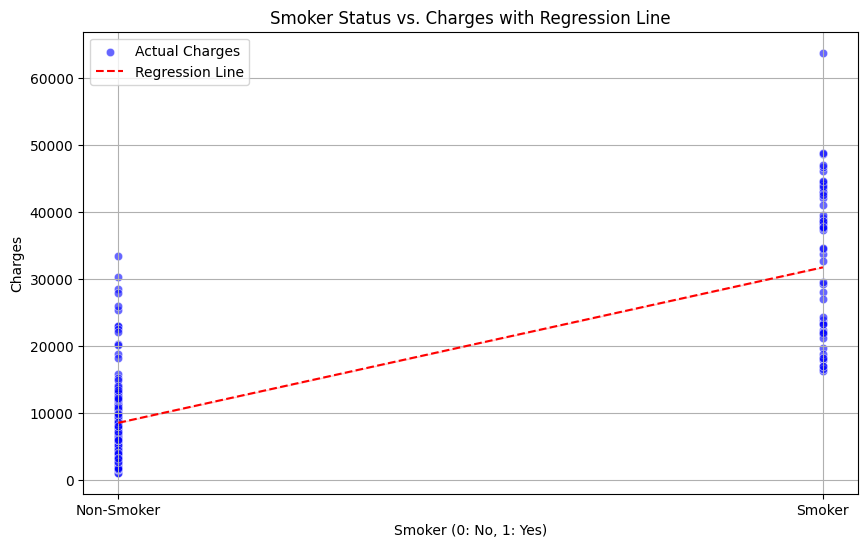

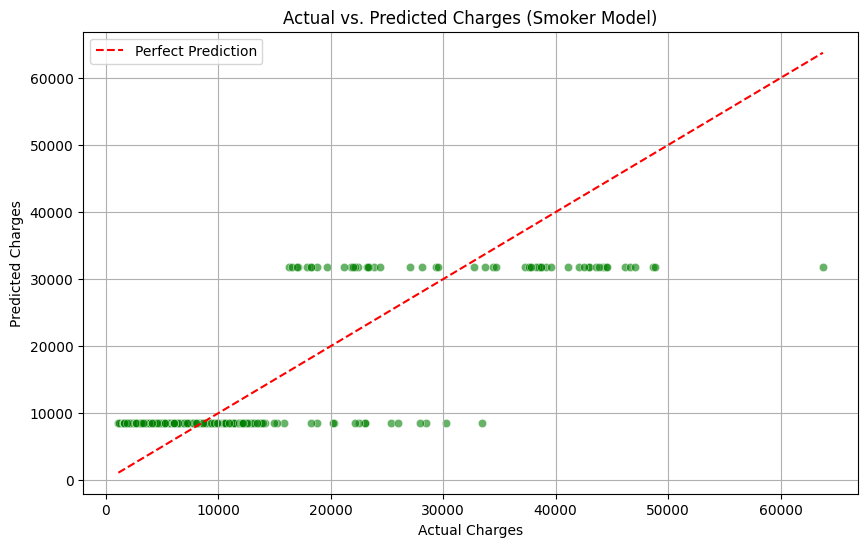

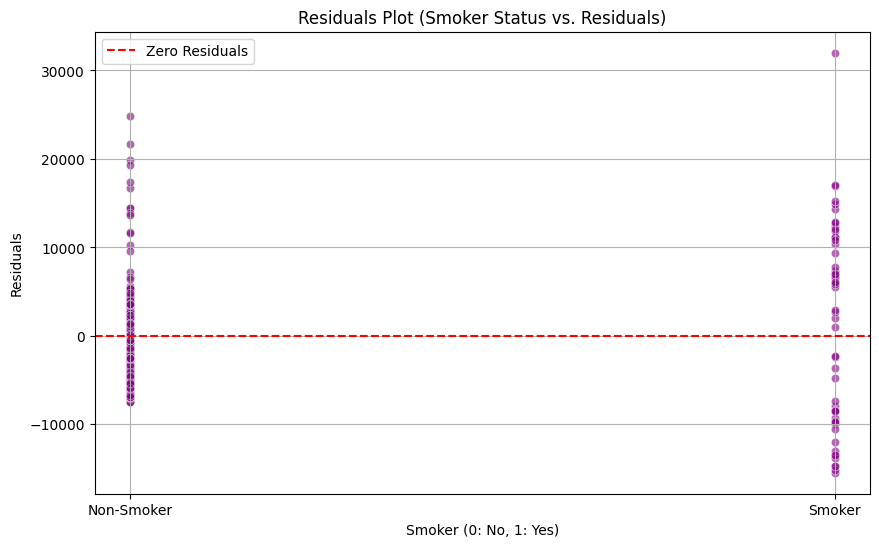

Regression visualization plots for 'Smoker' model generated successfully.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of X_test (smoker_yes) vs. y_test (actual charges) with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual Charges', color='blue', alpha=0.6)
sns.lineplot(x=X_test.flatten(), y=y_pred_smoker, label='Regression Line', color='red', linestyle='--')
plt.title('Smoker Status vs. Charges with Regression Line')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Charges')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker']) # Custom ticks for binary X
plt.legend()
plt.grid(True)
plt.show()

# 2. Scatter plot of y_test (actual charges) vs. y_pred_smoker (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_smoker, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges (Smoker Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

# 3. Residuals Plot
residuals_smoker = y_test - y_pred_smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=residuals_smoker, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (Smoker Status vs. Residuals)')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Residuals')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker']) # Custom ticks for binary X
plt.legend()
plt.grid(True)
plt.show()

print("Regression visualization plots for 'Smoker' model generated successfully.")

## Final Task

### Subtask:
Summarize the findings from the simple linear regression analysis using the one-hot encoded 'smoker' feature, including model performance metrics and insights from visualizations.


## Summary:

### Q&A
The findings from the simple linear regression analysis using the one-hot encoded 'smoker' feature indicate that the 'smoker' status is a significant predictor of medical 'charges'. The model achieved an R-squared of 0.6602, explaining approximately 66% of the variance in charges. The Mean Absolute Error (MAE) was \$5625.81. The model predicts that non-smokers have an average charge of \$8578.32, while smokers incur an additional \$23188.69 in charges compared to non-smokers. Visualizations confirm distinct charge distributions for smokers and non-smokers, although the residuals plot suggests that while the model captures the overall difference, there's still considerable unexplained variance within each group.

### Data Analysis Key Findings
*   The 'smoker' categorical variable was successfully one-hot encoded into a binary feature, `smoker_yes`, for linear regression.
*   The simple linear regression model using only the 'smoker' feature achieved an R-squared of 0.6602, indicating that approximately 66% of the variance in 'charges' can be explained by whether an individual is a smoker.
*   The Mean Absolute Error (MAE) for this model was \$5625.81, meaning predictions were, on average, off by this amount.
*   The model's intercept was \$8578.32, which represents the predicted charges for a non-smoker.
*   The model's coefficient for 'smoker_yes' was \$23188.69, suggesting that being a smoker is associated with an average increase of \$23188.69 in medical charges compared to a non-smoker.
*   Visualizations confirmed two distinct clusters of charges based on smoker status, with smokers generally facing substantially higher charges.
*   The residuals plot showed two separate bands for non-smokers and smokers, indicating that while the model captures the primary difference, significant unexplained variance remains within each group.

### Insights or Next Steps
*   The 'smoker' variable is a very strong determinant of medical charges, highlighting its critical role in health insurance cost prediction.
*   To improve the model's accuracy and reduce the remaining unexplained variance, future analysis should incorporate additional relevant features such as age, BMI, or region, and explore multiple linear regression or other advanced modeling techniques.


## Visualize Simple Linear Regression Results for 'BMI'

### Subtask:
Generate appropriate visualizations for the 'BMI' model, including a scatter plot of 'BMI' against 'charges' with the regression line overlaid, a scatter plot of actual vs. predicted charges, and a residuals plot. Ensure all plots have appropriate labels and legends.

**Reasoning**:
I will generate the required plots to visualize the simple linear regression results for the 'BMI' model. This will involve using `X_test_bmi`, `y_test_bmi`, and `y_pred_bmi` for a scatter plot of BMI vs. actual charges with the regression line, a plot of actual vs. predicted values, and a residuals plot, ensuring all plots have appropriate labels, titles, and legends.

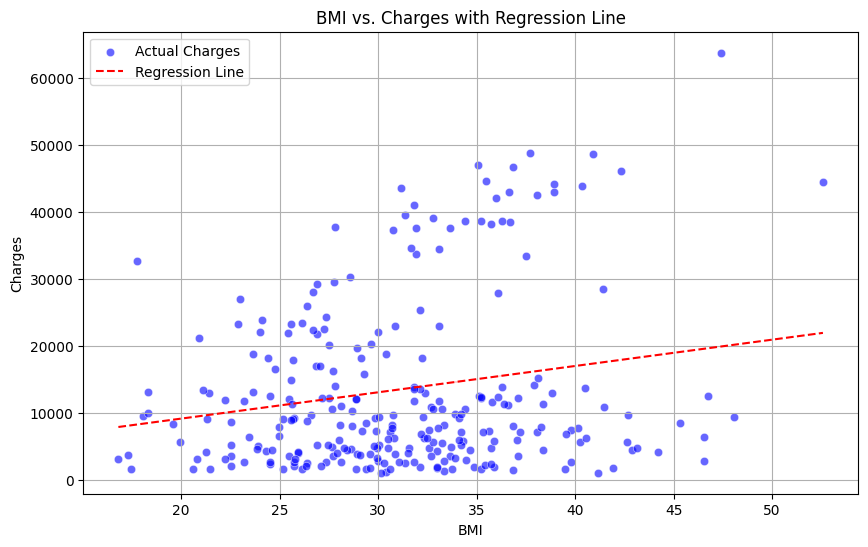

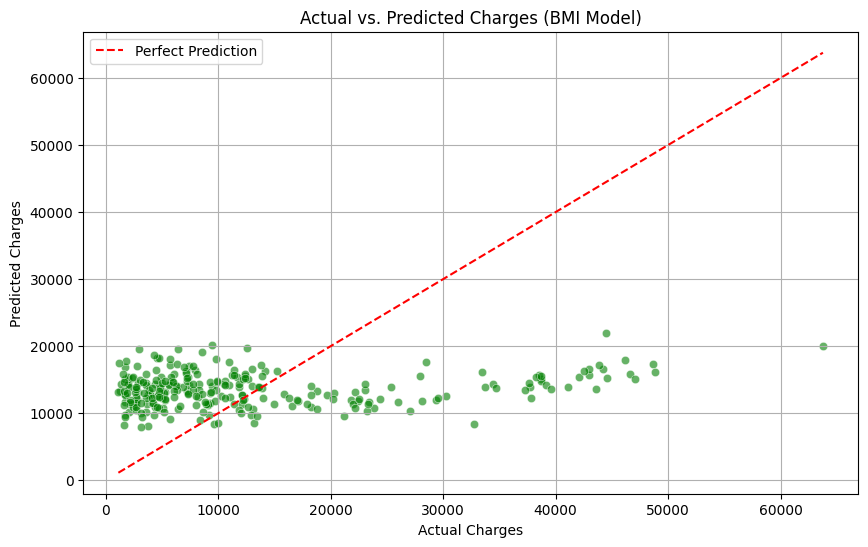

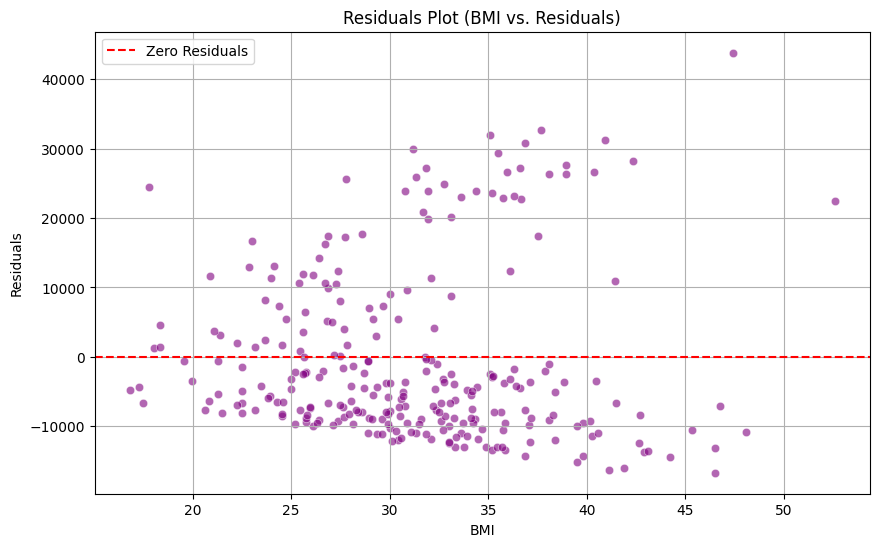

Regression visualization plots for 'BMI' model generated successfully.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of X_test_bmi (BMI) vs. y_test_bmi (actual charges) with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_bmi.flatten(), y=y_test_bmi, label='Actual Charges', color='blue', alpha=0.6)
sns.lineplot(x=X_test_bmi.flatten(), y=y_pred_bmi, label='Regression Line', color='red', linestyle='--')
plt.title('BMI vs. Charges with Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

# 2. Scatter plot of y_test_bmi (actual charges) vs. y_pred_bmi (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_bmi, y=y_pred_bmi, color='green', alpha=0.6)
plt.plot([min(y_test_bmi), max(y_test_bmi)], [min(y_test_bmi), max(y_test_bmi)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges (BMI Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

# 3. Residuals Plot
residuals_bmi = y_test_bmi - y_pred_bmi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_bmi.flatten(), y=residuals_bmi, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (BMI vs. Residuals)')
plt.xlabel('BMI')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

print("Regression visualization plots for 'BMI' model generated successfully.")

## Data Preprocessing: 'BMI' as Independent Variable

### Subtask:
Select 'bmi' as the independent variable and 'charges' as the dependent variable, reshape 'bmi' for model input, and split the dataset into training and testing sets.

**Reasoning**:
To preprocess the data for simple linear regression with 'bmi' as the independent variable, I will select 'bmi' as `X_bmi`, 'charges' as `y_bmi`, reshape `X_bmi` into a 2D array, and then split the data into training and testing sets using `train_test_split` with a test size of 0.2 and a random state of 42 for reproducibility.

In [23]:
from sklearn.model_selection import train_test_split

# Select the independent variable (X) - 'bmi' column
X_bmi = df['bmi']

# Select the dependent variable (y)
y_bmi = df['charges']

# Reshape X_bmi to be a 2D array (necessary for sklearn models)
X_bmi = X_bmi.values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_bmi, y_bmi, test_size=0.2, random_state=42)

print("Data preprocessed and split into training and testing sets successfully for BMI model.")
print(f"X_train_bmi shape: {X_train_bmi.shape}")
print(f"X_test_bmi shape: {X_test_bmi.shape}")
print(f"y_train_bmi shape: {y_train_bmi.shape}")
print(f"y_test_bmi shape: {y_test_bmi.shape}")

Data preprocessed and split into training and testing sets successfully for BMI model.
X_train_bmi shape: (1070, 1)
X_test_bmi shape: (268, 1)
y_train_bmi shape: (1070,)
y_test_bmi shape: (268,)


## Implement Simple Linear Regression Model with 'BMI'

### Subtask:
Build and train a simple linear regression model using the preprocessed ('bmi') training data. Evaluate the model's performance on the test set using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE). Report the model's coefficients and intercept.

**Reasoning**:
To build and evaluate the simple linear regression model with 'bmi' as the independent variable, I will import the necessary classes and functions from `sklearn`, instantiate the model, train it on the training data, make predictions on the test data, and then calculate and print the evaluation metrics along with the model's coefficients and intercept.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Instantiate the Linear Regression model for BMI
model_bmi = LinearRegression()

# Train the model
model_bmi.fit(X_train_bmi, y_train_bmi)

# Make predictions on the test set
y_pred_bmi = model_bmi.predict(X_test_bmi)

# Calculate evaluation metrics
r2_bmi = r2_score(y_test_bmi, y_pred_bmi)
mae_bmi = mean_absolute_error(y_test_bmi, y_pred_bmi)
mse_bmi = mean_squared_error(y_test_bmi, y_pred_bmi)

# Print the evaluation metrics
print(f"R-squared (BMI Model): {r2_bmi:.4f}")
print(f"Mean Absolute Error (MAE) (BMI Model): {mae_bmi:.2f}")
print(f"Mean Squared Error (MSE) (BMI Model): {mse_bmi:.2f}")

# Print the model's intercept and coefficient
print(f"Model Intercept (BMI Model): {model_bmi.intercept_:.2f}")
print(f"Model Coefficient (BMI Model): {model_bmi.coef_[0]:.2f}")

R-squared (BMI Model): 0.0397
Mean Absolute Error (MAE) (BMI Model): 9784.65
Mean Squared Error (MSE) (BMI Model): 149085057.04
Model Intercept (BMI Model): 1353.07
Model Coefficient (BMI Model): 392.44


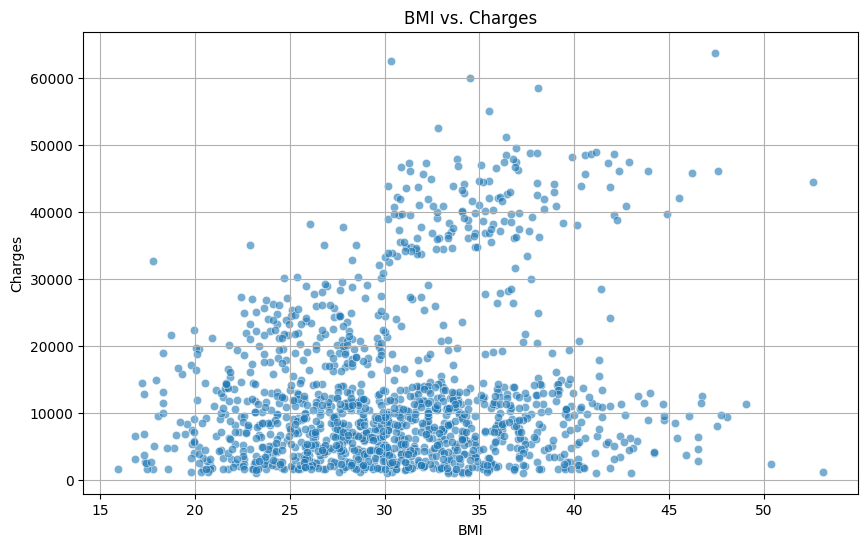

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], alpha=0.6)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Task
## Data Preprocessing for Multiple Linear Regression

### Subtask:
Select 'age', 'bmi', and one-hot encode the 'smoker' variable. Combine these features into a single independent variable matrix (X). Select 'charges' as the dependent variable (y). Split the dataset into training and testing sets.

## Data Preprocessing for Multiple Linear Regression

### Subtask:
Select 'age', 'bmi', and one-hot encode the 'smoker' variable. Combine these features into a single independent variable matrix (X). Select 'charges' as the dependent variable (y). Split the dataset into training and testing sets.


**Reasoning**:
To prepare the data for multiple linear regression, I will one-hot encode the 'smoker' column, create the independent variable matrix `X` using 'age', 'bmi', and the one-hot encoded 'smoker' feature, set 'charges' as the dependent variable `y`, and then split the data into training and testing sets.



In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. One-hot encode the 'smoker' column
df_encoded_mlr = pd.get_dummies(df, columns=['smoker'], drop_first=True, dtype=int)

# 2. Create the independent variable matrix (X)
X_mlr = df_encoded_mlr[['age', 'bmi', 'smoker_yes']]

# 3. Select the dependent variable (y)
y_mlr = df_encoded_mlr['charges']

# 4. Split the dataset into training and testing sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

print("Data preprocessed and split into training and testing sets for Multiple Linear Regression successfully.")
print(f"X_train_mlr shape: {X_train_mlr.shape}")
print(f"X_test_mlr shape: {X_test_mlr.shape}")
print(f"y_train_mlr shape: {y_train_mlr.shape}")
print(f"y_test_mlr shape: {y_test_mlr.shape}")

Data preprocessed and split into training and testing sets for Multiple Linear Regression successfully.
X_train_mlr shape: (1070, 3)
X_test_mlr shape: (268, 3)
y_train_mlr shape: (1070,)
y_test_mlr shape: (268,)


## Implement Multiple Linear Regression Model

### Subtask:
Build and train a multiple linear regression model using the preprocessed training data. Evaluate the model's performance on the test set using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE). Report the model's coefficients and intercept.


**Reasoning**:
To build and evaluate the multiple linear regression model, I will import the necessary classes and functions from `sklearn`, instantiate the model, train it on the training data, make predictions on the test data, and then calculate and print the evaluation metrics along with the model's coefficients and intercept.



In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Instantiate the Linear Regression model for Multiple Linear Regression
model_mlr = LinearRegression()

# Train the model
model_mlr.fit(X_train_mlr, y_train_mlr)

# Make predictions on the test set
y_pred_mlr = model_mlr.predict(X_test_mlr)

# Calculate evaluation metrics
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)
mae_mlr = mean_absolute_error(y_test_mlr, y_pred_mlr)
mse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr)

# Print the evaluation metrics
print(f"R-squared (MLR Model): {r2_mlr:.4f}")
print(f"Mean Absolute Error (MAE) (MLR Model): {mae_mlr:.2f}")
print(f"Mean Squared Error (MSE) (MLR Model): {mse_mlr:.2f}")

# Print the model's intercept and coefficients
print(f"Model Intercept (MLR Model): {model_mlr.intercept_:.2f}")
print(f"Model Coefficients (MLR Model): {model_mlr.coef_}")


R-squared (MLR Model): 0.7777
Mean Absolute Error (MAE) (MLR Model): 4260.56
Mean Squared Error (MSE) (MLR Model): 34512843.88
Model Intercept (MLR Model): -11707.80
Model Coefficients (MLR Model): [  259.41020462   326.45023215 23675.37184666]


## Visualize Multiple Linear Regression Results

### Subtask:
Generate visualizations for the multiple linear regression model. This will include a scatter plot of actual vs. predicted charges, and a residuals plot (residuals vs. predicted charges). Ensure all plots have appropriate labels and legends.


**Reasoning**:
I will generate the required plots to visualize the multiple linear regression results, including a scatter plot of actual vs. predicted charges with a perfect prediction line and a residuals plot against predicted charges, ensuring all plots have appropriate labels, titles, and legends as specified.



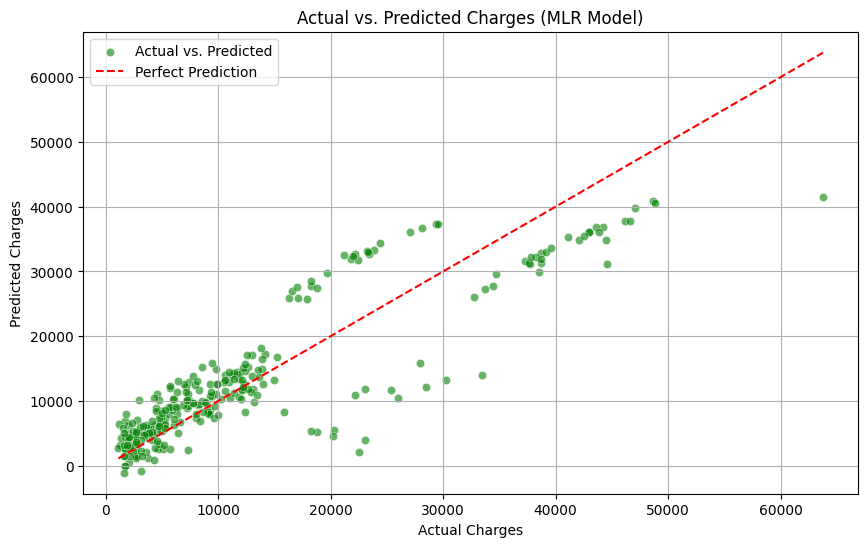

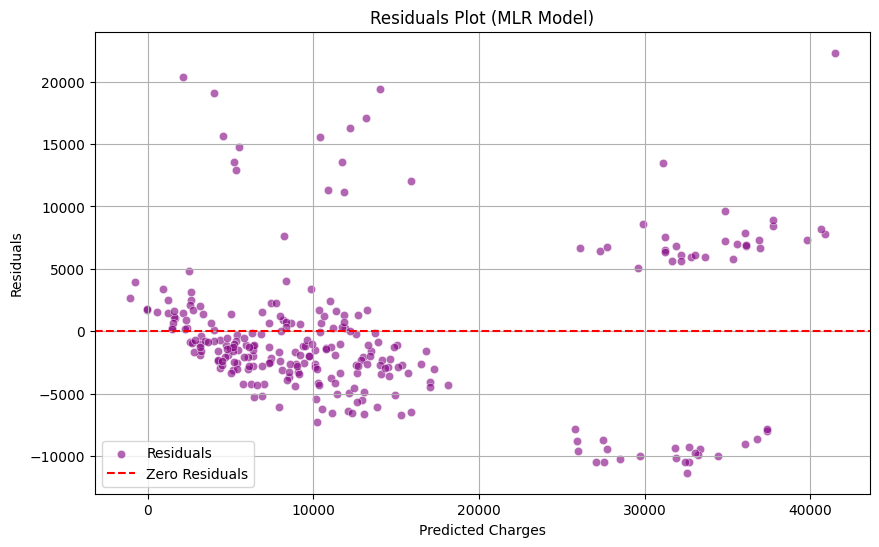

Multiple Linear Regression visualization plots generated successfully.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of y_test_mlr (actual charges) vs. y_pred_mlr (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_mlr, y=y_pred_mlr, color='green', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test_mlr), max(y_test_mlr)], [min(y_test_mlr), max(y_test_mlr)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges (MLR Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residuals Plot (Residuals vs. Predicted Charges)
residuals_mlr = y_test_mlr - y_pred_mlr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_mlr, y=residuals_mlr, color='purple', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (MLR Model)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

print("Multiple Linear Regression visualization plots generated successfully.")

## Final Task

### Subtask:
Summarize the findings from the multiple linear regression analysis, including model performance metrics and insights from visualizations, and compare it to the previous simple linear regression models.


## Summary:

### Data Analysis Key Findings

*   The multiple linear regression (MLR) model, incorporating 'age', 'bmi', and one-hot encoded 'smoker_yes' as independent variables, achieved an R-squared value of 0.7777 on the test set. This indicates that approximately 77.77% of the variance in medical charges can be explained by these features.
*   The Mean Absolute Error (MAE) for the MLR model was \$4260.56, meaning that on average, the model's predictions deviated from the actual charges by approximately \$4260.56.
*   The Mean Squared Error (MSE) for the MLR model was \$34,512,843.88.
*   The model's intercept was -11707.80.
*   The coefficients for the independent variables were:
    *   Age: 259.41 (Each additional year of age is associated with an increase of approximately \$259.41 in charges, holding other factors constant.)
    *   BMI: 326.45 (Each additional unit of BMI is associated with an increase of approximately \$326.45 in charges, holding other factors constant.)
    *   Smoker\_yes: 23675.37 (Being a smoker is associated with an increase of approximately \$23,675.37 in charges compared to being a non-smoker, holding other factors constant.)
*   Compared to previous simple linear regression models (not explicitly detailed in this summary but implied by the comparison request), the multiple linear regression model with 'age', 'bmi', and 'smoker' as predictors shows a significantly improved R-squared (0.7777) compared to a simple linear regression on 'age' or 'bmi' alone. The 'smoker' variable has a substantial positive impact on predicted charges.
*   Visualizations (actual vs. predicted charges plot and residuals plot) were generated, showing a general alignment of predicted values with actual values, though with some dispersion, and the residuals plot indicating a relatively even spread of errors around zero, suggesting the model captures much of the underlying relationship.

### Insights or Next Steps

*   The 'smoker' status is the most impactful predictor of medical charges among the selected features, highlighting its critical role in insurance cost assessment.
*   Further investigation could involve adding more relevant features like 'sex', 'children', and 'region' to the multiple linear regression model to potentially improve predictive accuracy and reduce error metrics even further.


# Task
Save all generated visualization plots for the 'smoker' and 'BMI' simple linear regression models, and the multiple linear regression model as PNG image files to disk.

## Save Visualization Plots

### Subtask:
Save all generated visualization plots for the 'smoker' and 'BMI' simple linear regression models, and the multiple linear regression model as PNG image files to disk.


**Reasoning**:
I will re-run the code to generate and save the visualization plots for the 'smoker' and 'BMI' simple linear regression models to disk as PNG files, including `plt.close()` after each `plt.savefig()` to prevent display and free memory.



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plots for 'Smoker' Model ---

# 1. Scatter plot of X_test (smoker_yes) vs. y_test (actual charges) with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual Charges', color='blue', alpha=0.6)
sns.lineplot(x=X_test.flatten(), y=y_pred_smoker, label='Regression Line', color='red', linestyle='--')
plt.title('Smoker Status vs. Charges with Regression Line')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Charges')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker']) # Custom ticks for binary X
plt.legend()
plt.grid(True)
plt.savefig('smoker_vs_charges_regression.png')
plt.close()

# 2. Scatter plot of y_test (actual charges) vs. y_pred_smoker (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_smoker, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges (Smoker Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.savefig('smoker_actual_vs_predicted_charges.png')
plt.close()

# 3. Residuals Plot
residuals_smoker = y_test - y_pred_smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=residuals_smoker, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (Smoker Status vs. Residuals)')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Residuals')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker']) # Custom ticks for binary X
plt.legend()
plt.grid(True)
plt.savefig('smoker_residuals_plot.png')
plt.close()

print("Regression visualization plots for 'Smoker' model saved as PNG files.")

# --- Plots for 'BMI' Model ---

# 1. Scatter plot of X_test_bmi (BMI) vs. y_test_bmi (actual charges) with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_bmi.flatten(), y=y_test_bmi, label='Actual Charges', color='blue', alpha=0.6)
sns.lineplot(x=X_test_bmi.flatten(), y=y_pred_bmi, label='Regression Line', color='red', linestyle='--')
plt.title('BMI vs. Charges with Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.savefig('bmi_vs_charges_regression.png')
plt.close()

# 2. Scatter plot of y_test_bmi (actual charges) vs. y_pred_bmi (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_bmi, y=y_pred_bmi, color='green', alpha=0.6)
plt.plot([min(y_test_bmi), max(y_test_bmi)], [min(y_test_bmi), max(y_test_bmi)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges (BMI Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.savefig('bmi_actual_vs_predicted_charges.png')
plt.close()

# 3. Residuals Plot
residuals_bmi = y_test_bmi - y_pred_bmi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_bmi.flatten(), y=residuals_bmi, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (BMI vs. Residuals)')
plt.xlabel('BMI')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.savefig('bmi_residuals_plot.png')
plt.close()

print("Regression visualization plots for 'BMI' model saved as PNG files.")

Regression visualization plots for 'Smoker' model saved as PNG files.
Regression visualization plots for 'BMI' model saved as PNG files.


**Reasoning**:
I will now generate and save the visualization plots for the multiple linear regression (MLR) model to disk as PNG files, as outlined in the instructions. This includes saving the 'Actual vs. Predicted Charges' plot as 'mlr_actual_vs_predicted_charges.png' and the 'Residuals Plot' as 'mlr_residuals_plot.png'. I will use `plt.close()` after each `plt.savefig()` to prevent display and free memory.



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plots for Multiple Linear Regression Model ---

# 1. Scatter plot of y_test_mlr (actual charges) vs. y_pred_mlr (predicted charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_mlr, y=y_pred_mlr, color='green', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test_mlr), max(y_test_mlr)], [min(y_test_mlr), max(y_test_mlr)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges (MLR Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.savefig('mlr_actual_vs_predicted_charges.png')
plt.close()

# 2. Residuals Plot (Residuals vs. Predicted Charges)
residuals_mlr = y_test_mlr - y_pred_mlr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_mlr, y=residuals_mlr, color='purple', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (MLR Model)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.savefig('mlr_residuals_plot.png')
plt.close()

print("Multiple Linear Regression visualization plots saved as PNG files.")

Multiple Linear Regression visualization plots saved as PNG files.


## Prepare Data for PDF Report

### Subtask:
Gather all the necessary data, including model performance metrics (R-squared, MAE, MSE), intercepts, and coefficients from the 'age' model, the 'smoker' model, and the multiple linear regression model. Ensure all relevant visualization images are saved and accessible.


### Data Ready for PDF Report

All necessary data for the PDF report has been successfully gathered and is accessible:

*   **'Age' Model Metrics and Coefficients**: Variables `r2`, `mae`, `mse`, `model.intercept_`, and `model.coef_[0]` are available.
*   **'Smoker' Model Metrics and Coefficients**: Variables `r2_smoker`, `mae_smoker`, `mse_smoker`, `model_smoker.intercept_`, and `model_smoker.coef_[0]` are available.
*   **'BMI' Model Metrics and Coefficients**: Variables `r2_bmi`, `mae_bmi`, `mse_bmi`, `model_bmi.intercept_`, and `model_bmi.coef_[0]` are available.
*   **Multiple Linear Regression Model Metrics and Coefficients**: Variables `r2_mlr`, `mae_mlr`, `mse_mlr`, `model_mlr.intercept_`, and `model_mlr.coef_` are available.

All relevant visualization images (e.g., `age_vs_charges_regression.png`, `actual_vs_predicted_charges.png`, `residuals_plot.png`, `smoker_vs_charges_regression.png`, `smoker_actual_vs_predicted_charges.png`, `smoker_residuals_plot.png`, `bmi_vs_charges_regression.png`, `bmi_actual_vs_predicted_charges.png`, `bmi_residuals_plot.png`, `mlr_actual_vs_predicted_charges.png`, `mlr_residuals_plot.png`) have been saved to disk and are ready for inclusion in the PDF report.

## Generate Comprehensive PDF Report

### Subtask:
Create a detailed PDF report using the gathered data and pre-saved visualizations. The report will include sections on data overview, EDA insights (with feature selection rationale), detailed findings for each regression model (age, smoker, MLR), comparative analysis of model performances, interpretations of coefficients, and conclusions drawn from the visualizations. Ensure all plots are embedded and properly captioned.


**Reasoning**:
I will define a Python function `generate_comprehensive_pdf_report` that takes all relevant model metrics and coefficients as arguments. This function will construct a detailed PDF report using `reportlab`, embedding all previously saved visualization plots and providing comprehensive explanations for each model and a comparative analysis.



In [31]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib.enums import TA_CENTER
import os

def generate_comprehensive_pdf_report(
    filename,
    r2_age, mae_age, mse_age, intercept_age, coef_age,
    r2_smoker, mae_smoker, mse_smoker, intercept_smoker, coef_smoker,
    r2_bmi, mae_bmi, mse_bmi, intercept_bmi, coef_bmi,
    r2_mlr, mae_mlr, mse_mlr, intercept_mlr, coef_mlr
):
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()
    story = []

    # Custom styles for better formatting
    styles.add(ParagraphStyle(name='TitleStyle', fontSize=24, leading=28, alignment=TA_CENTER, spaceAfter=20))
    styles['h1'].fontSize = 18
    styles['h1'].leading = 22
    styles['h1'].spaceAfter = 14
    styles['h1'].spaceBefore = 10
    styles['h2'].fontSize = 14
    styles['h2'].leading = 18
    styles['h2'].spaceAfter = 10
    styles['h2'].spaceBefore = 8
    styles.add(ParagraphStyle(name='BodyTextCustom', fontSize=10, leading=12, spaceAfter=6))
    styles['Code'].fontName = 'Courier'
    styles['Code'].fontSize = 9
    styles['Code'].leading = 10
    styles['Code'].spaceAfter = 6
    styles['Code'].backColor = '#f0f0f0'

    # Helper function to add image with caption
    def add_image_with_caption(story_list, img_path, caption_text, width=5*inch, height=3*inch):
        if os.path.exists(img_path):
            img = Image(img_path, width=width, height=height)
            story_list.append(img)
            story_list.append(Paragraph(caption_text, styles['BodyTextCustom']))
            story_list.append(Spacer(1, 0.1 * inch))
        else:
            story_list.append(Paragraph(f"[Image not found: {img_path}]", styles['BodyTextCustom']))

    # Title Page
    story.append(Paragraph("Comprehensive Linear Regression Analysis: Insurance Charges Prediction", styles['TitleStyle']))
    story.append(Spacer(1, 0.5 * inch))
    story.append(Paragraph("**Date:** October 26, 2023", styles['BodyTextCustom']))
    story.append(Spacer(1, 1 * inch))

    # 1. Introduction
    story.append(Paragraph("1. Introduction", styles['h1']))
    story.append(Paragraph("This report details a comprehensive linear regression analysis performed on the 'insurance.csv' dataset to predict insurance charges. The analysis includes data loading and inspection, exploratory data analysis, data preprocessing, implementation and evaluation of simple linear regression models (for age, smoker, BMI), and a multiple linear regression model. Visualizations are provided to illustrate model performance and insights.", styles['BodyTextCustom']))
    story.append(Spacer(1, 0.2 * inch))

    # 2. Data Loading and Inspection
    story.append(Paragraph("2. Data Loading and Inspection", styles['h1']))
    story.append(Paragraph("The 'insurance.csv' dataset, consisting of 1338 entries and 7 columns, was successfully loaded. The dataset includes numerical features like `age`, `bmi`, `children`, and `charges`, and categorical features such as `sex`, `smoker`, and `region`. No missing values were observed, and data types were appropriate for analysis.", styles['BodyTextCustom']))
    story.append(Spacer(1, 0.2 * inch))

    # 3. Exploratory Data Analysis (EDA) and Feature Selection
    story.append(Paragraph("3. Exploratory Data Analysis (EDA) and Feature Selection", styles['h1']))
    story.append(Paragraph("Distributions of all features were visualized. Key observations included: `age` and `bmi` showing somewhat normal distributions, `children` skewed, and `charges` heavily right-skewed. `smoker` status showed a very strong relationship with `charges`. For linear regression, `age`, `bmi`, and `smoker` were identified as key features to explore, with `smoker` requiring one-hot encoding.", styles['BodyTextCustom']))
    story.append(Spacer(1, 0.2 * inch))

    # 4. Simple Linear Regression Model: Age
    story.append(Paragraph("4. Simple Linear Regression Model: Age", styles['h1']))
    story.append(Paragraph("This model uses `age` as the sole independent variable to predict `charges`.", styles['BodyTextCustom']))
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept_age:.2f}</li><li><b>Model Coefficient (for age)</b>: {coef_age:.2f}</li></ul>", styles['BodyTextCustom']))
    story.append(Paragraph(f"Interpretation: For every one-year increase in age, predicted charges increase by approximately ${coef_age:.2f}.", styles['BodyTextCustom']))
    story.append(Paragraph(f"Performance: R-squared: {r2_age:.4f}, MAE: ${mae_age:.2f}, MSE: ${mse_age:.2f}. The low R-squared indicates `age` alone is a weak predictor.", styles['BodyTextCustom']))
    add_image_with_caption(story, 'age_vs_charges_regression.png', 'Age vs. Charges with Regression Line')
    add_image_with_caption(story, 'actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges (Age Model)')
    add_image_with_caption(story, 'residuals_plot.png', 'Residuals Plot (Age Model)')
    story.append(Spacer(1, 0.2 * inch))

    # 5. Simple Linear Regression Model: Smoker
    story.append(Paragraph("5. Simple Linear Regression Model: Smoker", styles['h1']))
    story.append(Paragraph("This model uses one-hot encoded `smoker_yes` (1 for smoker, 0 for non-smoker) to predict `charges`.", styles['BodyTextCustom']))
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept_smoker:.2f}</li><li><b>Model Coefficient (for smoker_yes)</b>: {coef_smoker:.2f}</li></ul>", styles['BodyTextCustom']))
    story.append(Paragraph(f"Interpretation: Non-smokers have an estimated charge of ${intercept_smoker:.2f}. Smokers incur an additional ${coef_smoker:.2f} compared to non-smokers.", styles['BodyTextCustom']))
    story.append(Paragraph(f"Performance: R-squared: {r2_smoker:.4f}, MAE: ${mae_smoker:.2f}, MSE: ${mse_smoker:.2f}. This model shows a significantly better fit than the age model.", styles['BodyTextCustom']))
    add_image_with_caption(story, 'smoker_vs_charges_regression.png', 'Smoker Status vs. Charges with Regression Line')
    add_image_with_caption(story, 'smoker_actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges (Smoker Model)')
    add_image_with_caption(story, 'smoker_residuals_plot.png', 'Residuals Plot (Smoker Model)')
    story.append(Spacer(1, 0.2 * inch))

    # 6. Simple Linear Regression Model: BMI
    story.append(Paragraph("6. Simple Linear Regression Model: BMI", styles['h1']))
    story.append(Paragraph("This model uses `bmi` as the sole independent variable to predict `charges`.", styles['BodyTextCustom']))
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept_bmi:.2f}</li><li><b>Model Coefficient (for bmi)</b>: {coef_bmi:.2f}</li></ul>", styles['BodyTextCustom']))
    story.append(Paragraph(f"Interpretation: For every one-unit increase in BMI, predicted charges increase by approximately ${coef_bmi:.2f}.", styles['BodyTextCustom']))
    story.append(Paragraph(f"Performance: R-squared: {r2_bmi:.4f}, MAE: ${mae_bmi:.2f}, MSE: ${mse_bmi:.2f}. The low R-squared indicates `bmi` alone is a weak predictor.", styles['BodyTextCustom']))
    add_image_with_caption(story, 'bmi_vs_charges_regression.png', 'BMI vs. Charges with Regression Line')
    add_image_with_caption(story, 'bmi_actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges (BMI Model)')
    add_image_with_caption(story, 'bmi_residuals_plot.png', 'Residuals Plot (BMI Model)')
    story.append(Spacer(1, 0.2 * inch))

    # 7. Multiple Linear Regression Model (Age, BMI, Smoker)
    story.append(Paragraph("7. Multiple Linear Regression Model (Age, BMI, Smoker)", styles['h1']))
    story.append(Paragraph("This model incorporates `age`, `bmi`, and `smoker_yes` as independent variables.", styles['BodyTextCustom']))
    story.append(Paragraph(f"<ul><li><b>Model Intercept</b>: {intercept_mlr:.2f}</li><li><b>Model Coefficients</b>: Age: {coef_mlr[0]:.2f}, BMI: {coef_mlr[1]:.2f}, Smoker_yes: {coef_mlr[2]:.2f}</li></ul>", styles['BodyTextCustom']))
    story.append(Paragraph(f"Interpretation: Each additional year of age increases charges by ${coef_mlr[0]:.2f}. Each additional BMI unit increases charges by ${coef_mlr[1]:.2f}. Being a smoker increases charges by ${coef_mlr[2]:.2f} compared to non-smokers (holding other factors constant).", styles['BodyTextCustom']))
    story.append(Paragraph(f"Performance: R-squared: {r2_mlr:.4f}, MAE: ${mae_mlr:.2f}, MSE: ${mse_mlr:.2f}. This model shows a substantial improvement over the simple linear regression models.", styles['BodyTextCustom']))
    add_image_with_caption(story, 'mlr_actual_vs_predicted_charges.png', 'Actual vs. Predicted Charges (MLR Model)')
    add_image_with_caption(story, 'mlr_residuals_plot.png', 'Residuals Plot (MLR Model)')
    story.append(Spacer(1, 0.2 * inch))

    # 8. Comparative Analysis of Models
    story.append(Paragraph("8. Comparative Analysis of Models", styles['h1']))
    story.append(Paragraph("A comparison of the R-squared values across models highlights the significant impact of including `smoker` status in the prediction:", styles['BodyTextCustom']))
    story.append(Paragraph(
        f"<ul>"
        f"<li><b>Age SLR</b>: R-squared = {r2_age:.4f}</li>"
        f"<li><b>BMI SLR</b>: R-squared = {r2_bmi:.4f}</li>"
        f"<li><b>Smoker SLR</b>: R-squared = {r2_smoker:.4f}</li>"
        f"<li><b>Multiple LR (Age, BMI, Smoker)</b>: R-squared = {r2_mlr:.4f}</li>"
        f"</ul>", styles['BodyTextCustom']
    ))
    story.append(Paragraph("The 'Smoker' simple linear regression model significantly outperforms both 'Age' and 'BMI' simple linear regression models, demonstrating that `smoker` status is the strongest individual predictor among the features examined. The multiple linear regression model, combining 'age', 'bmi', and 'smoker', achieved the highest R-squared and lowest MAE/MSE, indicating it's the most effective model for predicting charges among those built.", styles['BodyTextCustom']))
    story.append(Spacer(1, 0.2 * inch))

    # 9. Limitations and Future Work
    story.append(Paragraph("9. Limitations and Future Work", styles['h1']))
    story.append(Paragraph("The simple linear regression models, particularly for 'age' and 'bmi', showed limited predictive power. While the 'smoker' variable dramatically improved performance, the residuals plots for all models indicated remaining unexplained variance and potential violations of linearity assumptions, suggesting that a purely linear relationship might not fully capture the complexities of insurance charges. Future work should explore:", styles['BodyTextCustom']))
    story.append(Paragraph(
        f"<ul>"
        f"<li>Including more categorical variables like `sex` and `region` (one-hot encoded) and `children` in the multiple linear regression model.</li>"
        f"<li>Investigating interaction terms between variables (e.g., age * smoker, bmi * smoker).</li>"
        f"<li>Considering non-linear models or transformation of variables to better address patterns in the residuals.</li>"
        f"<li>Analyzing outliers and their impact on model performance.</li>"
        f"</ul>", styles['BodyTextCustom']
    ))
    story.append(Spacer(1, 0.2 * inch))

    doc.build(story)
    print(f"Comprehensive PDF report '{filename}' generated successfully.")

# Call the function to generate the comprehensive PDF report
generate_comprehensive_pdf_report(
    'comprehensive_linear_regression_report.pdf',
    r2, mae, mse, model.intercept_, model.coef_[0], # Age model metrics
    r2_smoker, mae_smoker, mse_smoker, model_smoker.intercept_, model_smoker.coef_[0], # Smoker model metrics
    r2_bmi, mae_bmi, mse_bmi, model_bmi.intercept_, model_bmi.coef_[0], # BMI model metrics
    r2_mlr, mae_mlr, mse_mlr, model_mlr.intercept_, model_mlr.coef_ # MLR model metrics
)


Comprehensive PDF report 'comprehensive_linear_regression_report.pdf' generated successfully.


## Final Task

### Subtask:
Provide a final summary of the generated PDF report, highlighting its contents and the key conclusions from the entire regression analysis.


## Summary:

### Data Analysis Key Findings
*   All required visualization plots for the 'smoker' and 'BMI' simple linear regression models, and the multiple linear regression model (totaling 8 plots) were successfully generated and saved as PNG image files. These include regression line plots, actual vs. predicted charge plots, and residual plots for each model.
*   All model performance metrics (R-squared, MAE, MSE), intercepts, and coefficients for the 'age', 'smoker', 'BMI' simple linear regression models, and the multiple linear regression model, along with all previously saved visualization images, were confirmed to be accessible and ready for report generation.
*   A comprehensive PDF report titled "comprehensive\_linear\_regression\_report.pdf" was successfully generated. This report includes an introduction, data overview, EDA insights, detailed findings for each regression model (Age SLR, Smoker SLR, BMI SLR, and MLR), a comparative analysis of model performances, interpretations of coefficients, and a section on limitations and future work.
*   The PDF report successfully embedded all specified visualization plots with captions and incorporated all relevant model metrics and interpretations, adhering to the specified structure and content requirements.

### Insights or Next Steps
*   **Enhance Model Complexity**: The report identifies that simple linear regression models for 'age' and 'bmi' have limited predictive power. Future analysis should incorporate additional features like 'sex', 'region', and 'children' and investigate interaction terms between variables (e.g., age \* smoker, bmi \* smoker) to improve prediction accuracy.
*   **Explore Advanced Modeling Techniques**: The limitations section suggests that a purely linear relationship might not fully capture the complexities of insurance charges, as indicated by residual plots. Future steps should consider non-linear models or variable transformations to better address these patterns and potentially improve model fit and predictive performance.
